In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# 1. Two Sum  

Given an array of integers, return indices of the two numbers such that they add up to a specific target.  
You may assume that each input would have exactly one solution, and you may not use the same element twice. 
Example:    
Given nums = [2, 7, 11, 15], target = 9,  
Because nums[0] + nums[1] = 2 + 7 = 9,  
return [0, 1].

**Solution1— two for loop**

In [6]:
def twoSum(nums, target):
    for i in range(len(nums)):
        for j in range(i+1,len(nums)):
            if nums[i]+nums[j]==target:
                return i,j

**Solution2— dict() store (target-val) and index**

In [55]:
def twoSum2(nums, target):
    d = dict()
    for i,num in enumerate(nums):
        if num in d:
            return [d[num],i]
        else:
            d[target-num] = i

In [ ]:
nums = [2, 7, 11, 15]
target = 9
twoSum2(nums, target)

# 2. Add Two Numbers

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order and each of their nodes contain a single digit. Add the two numbers and return it as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

Example: 
Input: (2 -> 4 -> 3) + (5 -> 6 -> 4)  
Output: 7 -> 0 -> 8  
Explanation: 342 + 465 = 807.

### Idea:

- initialize carry, dummy,p
- while loop l1 and l2
    - consider carry，sum//10 >> carry, sum%10 >> curr digit
    - update p,l1,l2
- if l1 longer or ..
- at last, if carry = 1, add it.

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
def addTwoNumbers(self, l1: ListNode, l2: ListNode) -> ListNode:
    if not l1:
        return l2
    if not l2:
        return l1
    
    # initialize node ,carry
    carry = 0
    p = dummy = ListNode(0)
    
    while l1 and l2:
        p.next = ListNode((l1.val + l2.val + carry)%10)
        carry = (l1.val + l2.val + carry)//10
        l1 = l1.next
        l2 = l2.next
        p = p.next
    if l2:
        while l2:
            p.next = ListNode((l2.val + carry) % 10)
            carry = (l2.val + carry) // 10
            l2 = l2.next
            p = p.next
    if l1:
        while l1:
            p.next = ListNode((l1.val + carry) % 10)
            carry = (l1.val + carry) // 10
            l1 = l1.next
            p = p.next
    if carry == 1:
        p.next = ListNode(1)
    return dummy.next

# 3. Longest Substring Without Repeating Characters

Given a string, find the length of the longest substring without repeating characters.

Example 1:  
Input: "abcabcbb"  
Output: 3   
Explanation: The answer is "abc", with the length of 3. 

Example 2:  
Input: "bbbbb"  
Output: 1  
Explanation: The answer is "b", with the length of 1.

Example 3:  
Input: "pwwkew"  
Output: 3  
Explanation: The answer is "wke", with the length of 3.   
Note that the answer must be a substring, "pwke" is a subsequence and not a substring.

# Idea: 
- dict
- traversal in str
    - if char showed before, count from there, 
    - count, record the max

In [32]:
def lengthOfLongestSubstring(s: str) -> int:
    if len(s) == 1:
        return 1
    start = -1
    max = 0
    d = {}
    
    for i in range(len(s)):
        if s[i] in d and d[s[i]]>start:
            start = d[s[i]]
            d[s[i]] = i
            print(d,i,start)
            
        else: 
            d[s[i]] = i
            if i  - start > max:
                max = i - start
            print(d,i,start)
    return max          

In [33]:
s = "au"
lengthOfLongestSubstring(s)
s = "pwwkew"
lengthOfLongestSubstring(s)
s = "bbbbb"
lengthOfLongestSubstring(s)
s = "dvdf"
lengthOfLongestSubstring(s)

{'a': 0} 0 -1
{'a': 0, 'u': 1} 1 -1


2

{'p': 0} 0 -1
{'p': 0, 'w': 1} 1 -1
{'p': 0, 'w': 2} 2 1
{'p': 0, 'w': 2, 'k': 3} 3 1
{'p': 0, 'w': 2, 'k': 3, 'e': 4} 4 1
{'p': 0, 'w': 5, 'k': 3, 'e': 4} 5 2


3

{'b': 0} 0 -1
{'b': 1} 1 0
{'b': 2} 2 1
{'b': 3} 3 2
{'b': 4} 4 3


1

{'d': 0} 0 -1
{'d': 0, 'v': 1} 1 -1
{'d': 2, 'v': 1} 2 0
{'d': 2, 'v': 1, 'f': 3} 3 0


3

# 5. Longest Palindromic Substring !!! - DP

Given a string s, find the longest palindromic substring in s. You may assume that the maximum length of s is 1000.

Example 1:
Input: "babad"  
Output: "bab"  
Note: "aba" is also a valid answer.

Example 2:  
Input: "cbbd"  
Output: "bb"

### Idea:  1. aba 2.abba
- main func : 
    - traversal each point in str
    - helper func
    - update the longest Palindrome of 2 ways above
- helper func: 向两边扩展 while loop, return qualfied Palindrome

In [93]:
def longestPalindrome(s: str) -> str:
    # initialize, traversal each point in str,getgetlongestPalindrome
    # consider 2 cases 1. aba 2. abba
    Palindrome = ""
    for i in range(len(s)):
        res1 = getlongestPalindrome(s,i,i)
        if len(res1) > len(Palindrome):
            Palindrome = res1

        res2 = getlongestPalindrome(s,i,i+1)
        if len(res2) > len(Palindrome):
            Palindrome = res2
    return Palindrome   

def getlongestPalindrome(s,l,r):
    while l >= 0 and r < len(s) and s[l]==s[r]:
        l -= 1
        r += 1
    return s[l+1:r]  

In [95]:
longestPalindrome(s="babad")

'bab'

# 7. Reverse Integer

Given a 32-bit signed integer, reverse digits of an integer.

Example 1:  
Input: 123  
Output: 321

Example 2:  
Input: -123  
Output: -321  

Example 3:  
Input: 120  
Output: 21  

Note:  
Assume we are dealing with an environment which could only store integers within the 32-bit signed integer range: [−2^31,  2^31 − 1]. For the purpose of this problem, assume that your function returns 0 when the reversed integer overflows.

In [81]:
def reverse(x: int) -> int:
    x = int(str(x)[::-1]) if x >= 0 else - int(str(-x)[::-1])
    return x if x < 2**31 and x >= -2**31 else 0

In [83]:
x = -123
reverse(x)

-321

# 8. String to Integer (atoi)

Implement atoi which converts a string to an integer.

The function first discards as many whitespace characters as necessary until the first non-whitespace character is found. Then, starting from this character, takes an optional initial plus or minus sign followed by as many numerical digits as possible, and interprets them as a numerical value.

The string can contain additional characters after those that form the integral number, which are ignored and have no effect on the behavior of this function.

If the first sequence of non-whitespace characters in str is not a valid integral number, or if no such sequence exists because either str is empty or it contains only whitespace characters, no conversion is performed.

If no valid conversion could be performed, a zero value is returned.

Note:  
Only the space character ' ' is considered as whitespace character.
Assume we are dealing with an environment which could only store integers within the 32-bit signed integer range: [−231,  231 − 1]. If the numerical value is out of the range of representable values, INT_MAX (231 − 1) or INT_MIN (−231) is returned.

Example 1:  
Input: "42"  
Output: 42  

Example 2:  
Input: "   -42"  
Output: -42  
Explanation: The first non-whitespace character is '-', which is the minus sign.Then take as many numerical digits as possible, which gets 42.

Example 3:  
Input: "4193 with words"  
Output: 4193  
Explanation: Conversion stops at digit '3' as the next character is not a numerical digit.

Example 4:   
Input: "words and 987"  
Output: 0  
Explanation: The first non-whitespace character is 'w', which is not a numerical digit or a +/- sign. Therefore no valid conversion could be performed.

Example 5:  
Input: "-91283472332"  
Output: -2147483648  
Explanation: The number "-91283472332" is out of the range of a 32-bit signed integer.Thefore INT_MIN (−231) is returned.

### Idea

1. str.strip([chars])
strip():Remove the specified characters at the beginning and end of the string (defaults to spaces or newlines) or character sequences
- starting with space " "
    - 1st non-sapce : num/ +/- √
    - 1st non-sapce : not num/ +/-, return 0
    
2. re.match(pattern, string, flags=0)
re.match 尝试从字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，match()就返回none。

In [96]:
def myAtoi(str: str) -> int:
    import re
    stripS = str.strip() #bye space!
    
    if stripS == "" or stripS == "-" or stripS == "+":
        return 0
    s1 = re.match('[^\d]+',(stripS.lstrip("-")).lstrip("+"))
    
    if s1 != None:
        return 0
    else:
        s1 = re.search('\-*\*+\d+',stripS).group()
        
    if s1[0:2] == "--" or s1[0:2] == "-+" or s1[0:2] == "++":
        return 0
    
    result = int(s1)
    if result > 0:
        return 2147483647 if result > 2147483647 else result
    else:
        return -2147483648 if result < -2147483648 else result

In [101]:
def myAtoi(str: str) -> int:
    str = str.lstrip() # 用于截掉字符串左边的空格或指定字符
    if str == '':      # 空string，返回None
        return 0
    flag = None       
    
    if str[0] == '+':  #flag 1：+
        flag = 1
        str = str[1:]
    elif str[0] == '-':#flag 0：-
        flag = 0
        str = str[1:]
        
    list = []
    for c in str:
        try:
            if int(c) != 0 or list != []: #filter num, 如果是字母或其他不是数字，break
                list.append(c)
            if len(list) > 10:
                break
        except:
            break
    if list == []:
        return 0
    num = int(''.join(list))
    num = (0 - num) if flag == 0 else num
    return min(max(-2147483648, num), 2147483647)

In [102]:
str =  "4193 with words"
myAtoi(str)
str = "words and 987"
myAtoi(str)
str = "-91283472332"  
myAtoi(str)

4193

0

-2147483648

# 9. Palindrome Number

Determine whether an integer is a palindrome. An integer is a palindrome when it reads the same backward as forward.

Example 1:  
Input: 121  
Output: true

Example 2:  
Input: -121    
Output: false   
Explanation: From left to right, it reads -121. From right to left, it becomes 121-. Therefore it is not a palindrome.

Example 3:  
Input: 10   
Output: false  
Explanation: Reads 01 from right to left. Therefore it is not a palindrome.

Follow up:  
Coud you solve it without converting the integer to a string?

In [15]:
def isPalindrome(x) -> bool:
    if x < 0:
        return False
    return int(str(x)[::-1]) == x

x = 121
isPalindrome(121)

True

# 11. Container With Most Water

Given n non-negative integers a1, a2, ..., an , where each represents a point at coordinate (i, ai). n vertical lines are drawn such that the two endpoints of line i is at (i, ai) and (i, 0). Find two lines, which together with x-axis forms a container, such that the container contains the most water.

Note: You may not slant the container and n is at least 2.

Example:  
Input: [1,8,6,2,5,4,8,3,7]  
Output: 49

In [156]:
# Time Limit Exceeded
def maxArea(height) -> int:
    max_area = 0
    for i in range(len(height)):
        for j in range(i+1,len(height)):
            area = abs(j-i)*(min(height[i],height[j]))
            max_area = max(area,max_area)
    return max_area

In [160]:
def maxArea2(height) -> int:
    left,right = 0,len(height)-1
    result = 0
    while left < right:
        water = min(height[left],height[right])*(right-left)
        if water > result:
            result = water
        if height[left] < height[right]:
            left += 1
        else:
            right -= 1
    return result

In [161]:
height = [1,8,6,2,5,4,8,3,7]
maxArea(height)

49

# 12. Integer to Roman

Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.  
Symbol       Value
I             1
V             5
X             10
L             50
C             100
D             500
M             1000
For example, two is written as II in Roman numeral, just two one's added together. Twelve is written as, XII, which is simply X + II. The number twenty seven is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

I can be placed before V (5) and X (10) to make 4 and 9.   
X can be placed before L (50) and C (100) to make 40 and 90.   
C can be placed before D (500) and M (1000) to make 400 and 900.  
Given an integer, convert it to a roman numeral. Input is guaranteed to be within the range from 1 to 3999.

Example 1:  
Input: 3  
Output: "III"  

Example 2:  
Input: 4  
Output: "IV" 

Example 3:  
Input: 9  
Output: "IX"  

Example 4:  
Input: 58  
Output: "LVIII"  
Explanation: L = 50, V = 5, III = 3. 

Example 5:  
Input: 1994  
Output: "MCMXCIV"  
Explanation: M = 1000, CM = 900, XC = 90 and IV = 4.

### Idea
- firstly, sort the values and numerals in a descending order
- while loop

In [59]:
def intToRoman(num) -> str:
    values = [1000,900,500,400,100,90,50,40,10,9,5,4,1]
    numerals = ['M','CM','D','CD','C','XC','L','XL','X','IX','V','IV','I']
    result = ''

    for i in range(len(values)):
        while num >= values[i]:
            result += numerals[i]
            num -= values[i]
    return result
num = 20
intToRoman(num)

'XX'

# 13. Roman to Integer

Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.
    
Symbol       Value
I             1
V             5
X             10
L             50
C             100
D             500
M             1000
For example, two is written as II in Roman numeral, just two one's added together. Twelve is written as, XII, which is simply X + II. The number twenty seven is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

I can be placed before V (5) and X (10) to make 4 and 9.   
X can be placed before L (50) and C (100) to make 40 and 90.   
C can be placed before D (500) and M (1000) to make 400 and 900.  
Given a roman numeral, convert it to an integer. Input is guaranteed to be within the range from 1 to 3999.  

Example 1:  
Input: "III"  
Output: 3
    
Example 2:  
Input: "IV"  
Output: 4  
    
Example 3:  
Input: "IX"  
Output: 9  
    
Example 4:  
Input: "LVIII"  
Output: 58  
Explanation: L = 50, V= 5, III = 3.  
    
Example 5:  
Input: "MCMXCIV"  
Output: 1994  
Explanation: M = 1000, CM = 900, XC = 90 and IV = 4.

In [34]:
def romanToInt(s) -> int:
    res = 0
    d = {"I":1,"V":5,"X":10,"L":50,"C":100,"D":500,"M":1000}    
    for i in range(len(s)-1):
        if d[s[i]]<d[s[i+1]]: #if small value stands before big val,"-", else "+"
            res -= d[s[i]]
        else:
            res += d[s[i]]
    return res + d[s[-1]]    #just plus the val of last letter, i only figure out this way to deal with loop out of range

s1 = "III" 
s2 = "IV"
s3 = "IX"
s4 = "LVIII"
s5 = "MCMXCIV"

romanToInt(s5)

1994

# 14. Longest Common Prefix

Write a function to find the longest common prefix string amongst an array of strings.  
If there is no common prefix, return an empty string "".  

Example 1:  
Input: ["flower","flow","flight"]  
Output: "fl"

Example 2:   
Input: ["dog","racecar","car"]  
Output: ""   
Explanation: There is no common prefix among the input strings.  
Note: All given inputs are in lowercase letters a-z.

In [41]:
def longestCommonPrefix(strs) -> str:
    if len(strs) == 0: return ''
    for l in range(len(strs[0])): #traversal every letter of first str 
        c = strs[0][l]
        for i in range(1,len(strs)): #traversal other strs, make comparison
            if l >= len(strs[i]) or c != strs[i][l]:                 
                return strs[0][:l]
    return strs[0] #e.g. ["",""]

In [46]:
strs = ["flower","flow","flight"]
strs2 = ["dog","racecar","car"]
longestCommonPrefix(strs)
longestCommonPrefix(strs2)

fl



# 15. 3Sum -- Medium

Given an array nums of n integers, are there elements a, b, c in nums such that a + b + c = 0?   
Find all unique triplets in the array which gives the sum of zero.

Note:  The solution set must not contain duplicate triplets.

Example:  
Given array nums = [-1, 0, 1, 2, -1, -4],  
A solution set is:    
[[-1, 0, 1],  
 [-1, -1, 2]]

## idea 
- sort()
- for loop i
    - sum of 3 smallest nums > 0 --> break
    - nums[i] + 2 biggest nums < 0 --> get rid of very first num --> continue, right shift
    - repeat nums --> continue
    - fix i
        - while loop: approach from both sides l,r

In [36]:
def threeSum(nums):
    n = len(nums)
    result = []
    nums.sort()

    for i in range(n-2):
        if nums[i] + nums[i+1] + nums[i+2] > 0: 
            break
        if nums[i] + nums[n-2] + nums[n-1] < 0:
            continue
        if 0 < i and nums[i] == nums[i-1]:
            continue
            
        l,r = i+1,n-1 #boundary
        
        while l < r:
            tmp = nums[i] + nums[l] + nums[r]
            if tmp == 0:
                result.append([nums[i],nums[l],nums[r]])
                while l+1 < r and nums[l] == nums[l+1]:
                    l += 1
                l += 1
                while l < r-1 and nums[r] == nums[r-1]:
                    r -= 1
                r -= 1
            elif tmp < 0:
                l += 1 
            else:
                r -= 1
    return result

In [39]:
nums = [-1, 0, 1, 2, -1, -4]
nums.sort()
nums
threeSum(nums)

[-4, -1, -1, 0, 1, 2]

[[-1, -1, 2], [-1, 0, 1]]

# 16. 3Sum Closest

Given an array nums of n integers and an integer target, find three integers in nums such that the sum is closest to target. Return the sum of the three integers. You may assume that each input would have exactly one solution.

Example:  
Given array nums = [-1, 2, 1, -4], and target = 1.  
The sum that is closest to the target is 2. (-1 + 2 + 1 = 2).

## Idea
- sort()
- initialization
- for loop, approach from 2 sides, [i,l,r]
- avoid repeating

In [43]:
def threeSumClosest(nums,target: int) -> int:
    nums.sort()
    result = nums[0]+nums[1]+nums[len(nums)-1]
    for i in range(len(nums)-2):
        if i > 0 and nums[i]==nums[i-1]:
            continue
        l = i + 1
        r = len(nums) - 1
        while l < r:
            val = nums[i]+nums[l]+nums[r] 
            if abs(val - target) < abs(result-target):
                result = val
            if val == target:
                return target
            elif val < target:
                l += 1
            else:
                r -= 1
    return result

In [49]:
nums = [-1, 2, 1, -4]
target = 1
threeSumClosest(nums,target)

2

# 17. Letter Combinations of a Phone Number

Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent.  
A mapping of digit to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

Example:
Input: "23"  
Output: ["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"].  

Note:  
Although the above answer is in lexicographical order, your answer could be in any order you want.

### Idea:
- for loop 1: digits
- for loop 2: each char in digits
- for loop 3: result = fetch match, need a tmp_list => output

In [78]:
def letterCombinations(digits):
    if len(digits) == 0:
        return []
    d = {
        0:"0",
        1:"1",
        2:"abc",
        3:"def",
        4:"ghi",
        5:"jkl",
        6:"mno",
        7:"pqrs",
        8:"tuv",
        9:"wxyz"
    }
    result = ['']
    for digit in digits:
        tmp_list = []
        for ch in d[int(digit)]:
            for str in result:
                tmp_list.append(str + ch)
                print(tmp_list)
        result = tmp_list
    return result

digits = "23" 
letterCombinations(digits)

['ad', 'bd', 'cd', 'ae', 'be', 'ce', 'af', 'bf', 'cf']

# 18. 4Sum

Given an array nums of n integers and an integer target, are there elements a, b, c, and d in nums such that a + b + c + d = target? Find all unique quadruplets in the array which gives the sum of target.

Note:The solution set must not contain duplicate quadruplets.

Example:  
Given array nums = [1, 0, -1, 0, -2, 2], and target = 0.  
A solution set is:  
[[-1,  0, 0, 1],  
  [-2, -1, 1, 2],  
  [-2,  0, 0, 2]]
 
 ### Idea:
 1. 2pointers + remain
 2. nums[i] + 3sum problem

In [6]:
def fourSum(nums, target: int):
    nums.sort()
    N = len(nums)
    res = []
    i = 0
    while i < N-3:
        j = i + 1
        while j < N-2:
            k = j + 1
            l = N - 1
            remain = target - nums[i] - nums[j]
            while k < l:
                if nums[k] + nums[l] > remain:
                    l -= 1
                elif nums[k] + nums[l] < remain:
                    k += 1
                else:
                    res.append([nums[i],nums[j],nums[k],nums[l]])
                    while k < l and nums[k] == nums[k+1]:
                        k += 1
                    while k < l and nums[l] == nums[l-1]:
                        l -= 1
                    k += 1
                    l -= 1
            while j < N - 2 and nums[j] == nums[j+1]:
                j += 1
            j += 1
        while i < N - 3 and nums[i] == nums[i+1]:
            i += 1
        i += 1
    return res

nums = [1, 0, -1, 0, -2, 2]
fourSum(nums, target=0)

[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]

# 20. Valid Parentheses -- stack FIFO apply to offset  and matching

Given a string containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.  
An input string is valid if:  
Open brackets must be closed by the same type of brackets.  
Open brackets must be closed in the correct order.   
Note that an empty string is also considered valid.  
  
Example 1:  
Input: "()"  
Output: true  
    
Example 2:  
Input: "()[]{}"  
Output: true  
    
Example 3:  
Input: "(]"  
Output: false  
    
Example 4:  
Input: "([)]"  
Output: false  
    
Example 5: 
Input: "{[]}"  
Output: true  

In [98]:
def isValid(s) -> bool:
    if len(s) == 0: # case1: empty string is valid
        return True
    d = {")": "(", "}": "{", "]": "["}
    stack = [None]
    for i in s:
        if i in d and d[i] == stack[-1]: #如果是反括号，前括号刚好在stack的栈顶，pop()。后出现的，需要先消掉，解决顺序问题。
            stack.pop()
        else: 
            stack.append(i)
    return len(stack)==1

In [99]:
s =  "()[]{}"
isValid(s)

True

# 21. Merge Two Sorted Lists -- Linked List -- Recursion

Merge two sorted linked lists and return it as a new list. The new list should be made by splicing together the nodes of the first two lists.

Example:  
Input: 1->2->4, 1->3->4  
Output: 1->1->2->3->4->4  

In [46]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
def mergeTwoLists(self,l1,l2):
    if not l1:
        return l2
    if not l2:
        return l1
    if l1.val < l2.val: #based on smaller first num of 2 linked list, recursion,comparison, insert smaller num one by one
        l1.next = self.mergeTwoLists(l1.next,l2)
        return l1
    else:
        l2.next = self.mergeTwoLists(l1,l2.next)
        return l2

In [ ]:
def mergeTwoLists(self,l1,l2):
    curr = dummy = ListNode(0) # dummy - virtual node - ListNode(0), update curr.
    while l1 and l2:
        if l1.val < l2.val:
            curr.next = l1 #add the smaller one
            l1 = l1.next   #update the l1
        else:
            curr.next = l2
            l2 = l2.next
        curr = curr.next 
    curr.next = l1 or l2 #extend the rest of the langer list l1 or l2
    return dummy.next

# 22. Generate Parentheses
Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.  
For example, given n = 3, a solution set is:  
[
  "((()))",  
  "(()())",  
  "(())()",  
  "()(())",  
  "()()()" ]
  
### idea - recursion
- len("(") >len(")")  + "(" or ")"
- len("(") = len(")") + "("

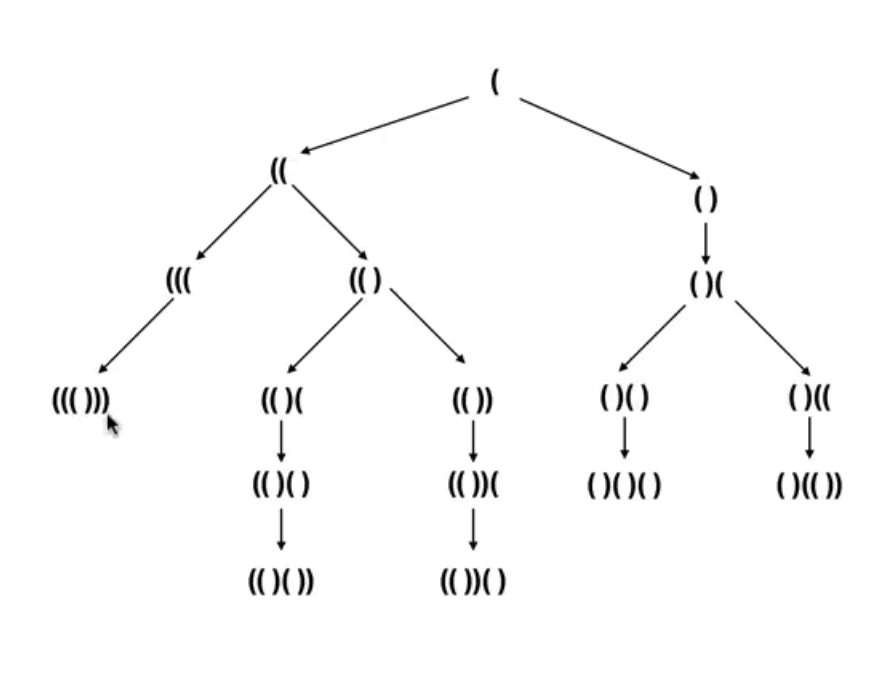

In [108]:
from IPython.display import Image
Image(filename = '22.png', width=400, height=500)

In [ ]:
def generateParenthesis(self,n):
    if n == 0:
        return []
    
    result = []
    self.helper(n,n.'',result)
    return result

def helper(self,l,r,item,result):
    if r < l:                    #left_) < left_(  -->>  cur_) < cur_( , not satisfiy, not append
        return
    if l == 0 and r == 0:       # no left Parenthesis, append
        result.append(item)
    if l > 0:                   # ( left
        self.helper(l-1,r,item+'(',result)
    if r > 0:                   # ) left
        self.helper(l,r-1,item+')',result)

# 24. Swap Nodes in Pairs

Given a linked list, swap every two adjacent nodes and return its head.    
You may not modify the values in the list's nodes, only nodes itself may be changed.

Example:  
Given 1->2->3->4->5->6, you should return the list as 2->1->4->3->6->5.

### Idea: 3 pointers - swap+replace+insertion
- p = head = 1
- new_start = p.next, for return result
- while loop:
    - q = p.next = 2, temp = q.next = 3 | p=1 > q=2 > temp=3
    - swap1 from front to back: q=2 > p=1 > temp=3
    - if not temp or not temp.next:
        - p.next > temp, break 
    - swap2: q=2 > p=1 > temp.next=4> temp=3
    - update p = temp = 3
    - q = p.next = 5, temp = q.next = 6, q=2 > p=1 > temp.next=4> p=temp=3 > q=5 > temp=6
    - if not temp or not temp.next:
        - p.next > temp, break,  new_start > q=2 > p=1 > temp.next=4> p=temp=3  > temp=6 > q=5     

In [ ]:
def swapPairs(self, head: ListNode) -> ListNode:
    if not head or not head.next:
        return head
    
    p = head
    new_start = p.next
    while(True):
        q = p.next
        temp = q.text
        
        q.next = p
        if not temp or not temp.next:
            p.next = temp
            break
        p.next = temp.next
        p = temp
    return new_start

### Solution 2 
- 3 pointers for swap, replace, update
- while loop
    - pre > head=1 > temp=2 > 3 > 4
    - swap from back to front: pre > temp=2 > head=1 > 3
    - update pre and head

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def swapPairs(self, head: ListNode) -> ListNode:
        if not head or not head.next:
            return head
        pre = new_head = ListNode(0)
        while head and head.next:
            temp = head.next
            head.next = temp.next
            temp.next = head
            pre.next = temp
            
            #update
            pre = head
            head = head.next
        return new_head.next

# 26. Remove Duplicates from Sorted Array - Easy - Array

Given a sorted array nums, remove the duplicates in-place such that each element appear only once and return the new length.

Do not allocate extra space for another array, you must do this by modifying the input array in-place with O(1) extra memory.

Example 1:  
Given nums = [1,1,2],  
Your function should return length = 2, with the first two elements of nums being 1 and 2 respectively.  
It doesn't matter what you leave beyond the returned length.

Example 2:  
Given nums = [0,0,1,1,1,2,2,3,3,4],  
Your function should return length = 5, with the first five elements of nums being modified to 0, 1, 2, 3, and 4 respectively.  
It doesn't matter what values are set beyond the returned length.

Clarification:  
Confused why the returned value is an integer but your answer is an array?  
Note that the input array is passed in by reference, which means modification to the input array will be known to the caller as well.  

Internally you can think of this:
// nums is passed in by reference. (i.e., without making a copy)  
int len = removeDuplicates(nums);   
// any modification to nums in your function would be known by the caller.  
// using the length returned by your function, it prints the first len elements.  
for (int i = 0; i < len; i++) {  
    print(nums[i]);  
}  

In [17]:
def removeDuplicates(nums) -> int:
    nums[:]=sorted(list(set(nums)))

In [14]:
def removeDuplicates(nums) -> int:
    if not nums:
        return 0
    count = 0
    for i in range(len(nums)):
        if nums[count] != nums[i]:
            count += 1
            nums[count] = nums[i]
    return count+1  

In [19]:
nums = [0,0,1,1,1,2,2,3,3,4]
removeDuplicates(nums)

None


# 27. Remove Element

Given an array nums and a value val, remove all instances of that value in-place and return the new length.

Do not allocate extra space for another array, you must do this by modifying the input array in-place with O(1) extra memory.

The order of elements can be changed. It doesn't matter what you leave beyond the new length.

Example 1:  
Given nums = [3,2,2,3], val = 3,  
Your function should return length = 2, with the first two elements of nums being 2.  
It doesn't matter what you leave beyond the returned length.

Example 2:  
Given nums = [0,1,2,2,3,0,4,2], val = 2,  
Your function should return length = 5, with the first five elements of nums containing 0, 1, 3, 0, and 4.

In [21]:
def removeElement(nums, val: int) -> int:
    i,last = 0, len(nums)-1
    while i <= last:
        if nums[i] == val:
            nums[i],nums[last] = nums[last],nums[i]
            last -= 1
        else:
            i += 1
    return last + 1

'''
e.g. nums = [3,2,2,3],val=3, i=0, last=3
round 1: nums[0]==val,swap [3,2,2,3] last-1=2
round 2: nums[0]==val,swap [2,2,3,3] last-1=1
round 3: nums[0]!=val,     [2,2,3,3] i+1=1
round 4: nums[1]!=val,     [2,2,3,3] i+1=2, break while loop
round 5: return last+1
'''

# 28. Implement strStr()

Implement strStr().  
Return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.

Example 1:  
Input: haystack = "hello", needle = "ll"  
Output: 2

Example 2:  
Input: haystack = "aaaaa", needle = "bba"  
Output: -1  

Clarification:  
What should we return when needle is an empty string? This is a great question to ask during an interview.  
For the purpose of this problem, we will return 0 when needle is an empty string. This is consistent to C's strstr() and Java's indexOf().

### my solution

In [110]:
def strStr(haystack: str, needle: str) -> int:
    if not needle:
        return 0

    for i in range(len(haystack)-len(needle)+1):  # !!!!
        if haystack[i] == needle[0]: # or straight forward, remove this condition
            if haystack[i:i+len(needle)] == needle:
                return i 
    return -1

In [112]:
haystack = "hello"
needle = "ll"
strStr(haystack,needle)
haystack = "aaaaa" 
needle = "bba"
strStr(haystack,needle)

2

-1

# 21. Next Permutation

Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers.  
If such arrangement is not possible, it must rearrange it as the lowest possible order (ie, sorted in ascending order).    
The replacement must be in-place and use only constant extra memory.    
Here are some examples. Inputs are in the left-hand column and its corresponding outputs are in the right-hand column.  
1,2,3 → 1,3,2  
3,2,1 → 1,2,3  
1,1,5 → 1,5,1 

### Idea
- 规律有些难找，先找到从后向前数，第一个降序的位置，再把这个降序数字和后面第一个比它大的位置交换，最后将这个降序数字后的重新进行排序。

In [2]:
def nextPermutation(nums) -> None:
    start = len(nums)-2
    end = len(nums) - 1
    while start >= 0 and nums[start] >= nums[start+1]:
        start -= 1
    while end >= 0 and nums[start] >= nums[end]:
        end -= 1
    nums[start], nums[end] = nums[end], nums[start]
    nums[start+1:] = sorted(nums[start+1:])
        

# 35. Search Insert Position -- Take advantage of what we know -- sorted array

Given a sorted array and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.

You may assume no duplicates in the array.

Example 1:  
Input: [1,3,5,6], 5  
Output: 2

Example 2:  
Input: [1,3,5,6], 2  
Output: 1  

Example 3:  
Input: [1,3,5,6], 7  
Output: 4  

Example 4:  
Input: [1,3,5,6], 0  
Output: 0

In [48]:
 def searchInsert(nums, target) -> int:
        if target > nums[-1]:
            return len(nums)

        for i in range(len(nums)):
            if nums[i] >= target:
                return i

In [49]:
nums = [1,3]
target = 2
searchInsert(nums,target)

1

# 36. Valid Sudoku

Determine if a 9x9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

Each row must contain the digits 1-9 without repetition.
Each column must contain the digits 1-9 without repetition.
Each of the 9 3x3 sub-boxes of the grid must contain the digits 1-9 without repetition.

The Sudoku board could be partially filled, where empty cells are filled with the character '.'.

Example 1:  
Input:  
[
  ["5","3",".",".","7",".",".",".","."],  
  ["6",".",".","1","9","5",".",".","."],  
  [".","9","8",".",".",".",".","6","."],  
  ["8",".",".",".","6",".",".",".","3"],  
  ["4",".",".","8",".","3",".",".","1"],  
  ["7",".",".",".","2",".",".",".","6"],  
  [".","6",".",".",".",".","2","8","."],  
  [".",".",".","4","1","9",".",".","5"],  
  [".",".",".",".","8",".",".","7","9"]]   
Output: true  

Example 2:  
Input:  
[
  ["8","3",".",".","7",".",".",".","."],  
  ["6",".",".","1","9","5",".",".","."],  
  [".","9","8",".",".",".",".","6","."],  
  ["8",".",".",".","6",".",".",".","3"],  
  ["4",".",".","8",".","3",".",".","1"],  
  ["7",".",".",".","2",".",".",".","6"],  
  [".","6",".",".",".",".","2","8","."],  
  [".",".",".","4","1","9",".",".","5"],  
  [".",".",".",".","8",".",".","7","9"]]  
Output: false  
Explanation: Same as Example 1, except with the 5 in the top left corner being modified to 8. Since there are two 8's in the top left 3x3 sub-box, it is invalid.
Note:  
A Sudoku board (partially filled) could be valid but is not necessarily solvable.  
Only the filled cells need to be validated according to the mentioned rules.  
The given board contain only digits 1-9 and the character '.'.  
The given board size is always 9x9.

In [2]:
def isValidSudoku(board) -> bool:
    return self.row_isvalid(board) and self.col_isvalid(board) and self.square_isvalid(board)

def row_isvalid(self,board):
    for row in board:
        if not self.unit_isvalid(row):
            return False
    return True

def col_isvalid(self,board):
    for col in zip(*board):
        if not self.unit_isvalid(col):
            return False
    return True

def square_isvalid(self,board):
    for i in (0,3,6):
        for j in (0,3,6):
            square = [board[x][y] for x in range(i,i+3) for y in range(j,j+3)]
            if not self.unit_isvalid(square):
                return False
    return True

def unit_isvalid(self,unit):
    unit = [i for i in unit if i != '.']
    return len(unit) == len(set(unit))

In [1]:
board = [
  ["8","3",".",".","7",".",".",".","."],
  ["6",".",".","1","9","5",".",".","."],
  [".","9","8",".",".",".",".","6","."],
  ["8",".",".",".","6",".",".",".","3"],
  ["4",".",".","8",".","3",".",".","1"],
  ["7",".",".",".","2",".",".",".","6"],
  [".","6",".",".",".",".","2","8","."],
  [".",".",".","4","1","9",".",".","5"],
  [".",".",".",".","8",".",".","7","9"]
]
for col in zip(*board):
    print(col)

('8', '6', '.', '8', '4', '7', '.', '.', '.')
('3', '.', '9', '.', '.', '.', '6', '.', '.')
('.', '.', '8', '.', '.', '.', '.', '.', '.')
('.', '1', '.', '.', '8', '.', '.', '4', '.')
('7', '9', '.', '6', '.', '2', '.', '1', '8')
('.', '5', '.', '.', '3', '.', '.', '9', '.')
('.', '.', '.', '.', '.', '.', '2', '.', '.')
('.', '.', '6', '.', '.', '.', '8', '.', '7')
('.', '.', '.', '3', '1', '6', '.', '5', '9')


# 38. Count and Say
The count-and-say sequence is the sequence of integers with the first five terms as following:  

1.     1  
2.     11  
3.     21  
4.     1211  
5.     111221  
1 is read off as "one 1" or 11.  
11 is read off as "two 1s" or 21.  
21 is read off as "one 2, then one 1" or 1211.  

Given an integer n where 1 ≤ n ≤ 30, generate the nth term of the count-and-say sequence. You can do so recursively, in other words from the previous member read off the digits, counting the number of digits in groups of the same digit. 

Note: Each term of the sequence of integers will be represented as a string.

Example 1:  
Input: 1  
Output: "1"  
Explanation: This is the base case.  

Example 2:  
Input: 4  
Output: "1211"  
Explanation: For n = 3 the term was "21" in which we have two groups "2" and "1", "2" can be read as "12" which means frequency = 1 and value = 2, the same way "1" is read as "11", so the answer is the concatenation of "12" and "11" which is "1211".

In [ ]:
def countAndSay(self,n) -> str:
    seq = "1" #initialization
    for _ in range(n-1):
        seq = self.getNext(seq)
    return seq

def getNext(self,seq):
    i, next_seq = 0, ""
    while i < len(seq): # count each char
        count = 1 
        while i < len(seq)-1 and seq[i] == seq[i+1]: # recount when different char
            count += 1
            i += 1
        next_seq += str(count) + seq[i]
        i += 1
    return next_seq        

# 46. Permutations - recursion

Given a collection of distinct integers, return all possible permutations.  
Example:  
Input: [1,2,3]  
Output:  
[
  [1,2,3],
  [1,3,2],
  [2,1,3],
  [2,3,1],
  [3,1,2],
  [3,2,1]
]

In [ ]:
def permute(nums):
    if len(nums) <= 1:
        return [nums]
    
    answer = []
    for i,num in enumerate(nums):
        n = nums[:i] + nums[i+1:]
        for y in self.permute(n):
            answer.append([num] + y)
    return answer

nums = [1,2,3]
permute(nums)

# 48. Rotate Image

You are given an n x n 2D matrix representing an image.  
Rotate the image by 90 degrees (clockwise).  
Note: You have to rotate the image in-place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.

Example 1:  
Given input matrix =   
[  [1,2,3],  
  [4,5,6],  
  [7,8,9]  ],  
rotate the input matrix in-place such that it becomes:  
[  [7,4,1],  
  [8,5,2],  
  [9,6,3]  ]  
  
Example 2:  
Given input matrix =  
[  [ 5, 1, 9,11],  
  [ 2, 4, 8,10],  
  [13, 3, 6, 7],  
  [15,14,12,16]  ],   
rotate the input matrix in-place such that it becomes:  
[  [15,13, 2, 5],  
  [14, 3, 4, 1],  
  [12, 6, 8, 9],  
  [16, 7,10,11]  ]

### Solution - upper left partition
- now_row = original_col
- now_col = len - original_row

In [135]:
def rotate(matrix) -> None:
    """
    Do not return anything, modify matrix in-place instead.
    """
    m = len(matrix) 
    n = m -1
    for i in range(m//2):
        for j in range(i,n-i):
            tmp = matrix[i][j]
            matrix[i][j] = matrix[n-j][i]
            matrix[n-j][i] = matrix[n-i][n-j]
            matrix[n-i][n-j] = matrix[j][n-i]
            matrix[j][n-i] = tmp              
    return matrix

In [136]:
matrix = [ [1,2,3],
           [4,5,6],
           [7,8,9] ]
rotate(matrix)

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]

# 49. Group Anagrams

Given an array of strings, group anagrams together.   
Example:  
Input: ["eat", "tea", "tan", "ate", "nat", "bat"],  
Output:  
[
  ["ate","eat","tea"],  
  ["nat","tan"],  
  ["bat"] ]  
Note:    
All inputs will be in lowercase.  
The order of your output does not matter.

### Solution:
- straight forward
- dict
- d.keys() >> "".join(sorted(str))

In [58]:
def groupAnagrams(strs):
    d = {}
    if len(strs) < 1:
        return strs
    
    for str_ in strs:
        sortstr = "".join(sorted(str_))
        if sortstr in d:
            d[sortstr].append(str_)
        else:
            d[sortstr] = [str_]
    return d.values()

In [59]:
strs = ["eat", "tea", "tan", "ate", "nat", "bat"]
groupAnagrams(strs)

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])

# 54. Spiral Matrix

Given a matrix of m x n elements (m rows, n columns), **return all elements of the matrix in spiral order.**

Example 1:  
Input:  
[  [ 1, 2, 3 ],   
  [ 4, 5, 6 ],   
  [ 7, 8, 9 ] ]  
Output: [1,2,3,6,9,8,7,4,5]
    
Example 2:  
Input:   
[  [1, 2, 3, 4],    
  [5, 6, 7, 8],  
  [9,10,11,12] ]  
Output: [1,2,3,4,8,12,11,10,9,5,6,7]

In [ ]:
def spiralOrder(self,matrix):
    row = len(matrix)
    if row == 0 or len(matrix[0]) == 0:
        return []
    col = len(matrix[0])
    res = matrix[0]
    if row > 1:
        for i in range(1,row):
            res.append(matrix[i][col-1])
        for j in range(col-2,-1,-1):
            res.append(matrix[row-1][j])
        if col > 1:
            for i in range(row-2,0,-1):
                res.append(matrix[i][0])

    M = []
    for k in range(1,row-1):
        t = matrix[k][1:-1]
        M.append(t)
    return res + self.spiralOrder(M)                         

# 56. Merge Intervals

Given a collection of intervals, merge all overlapping intervals.

Example 1:  
Input: [[1,3],[2,6],[8,10],[15,18]]  
Output: [[1,6],[8,10],[15,18]]  
Explanation: Since intervals [1,3] and [2,6] overlaps, merge them into [1,6].

Example 2:  
Input: [[1,4],[4,5]]  
Output: [[1,5]]  
Explanation: Intervals [1,4] and [4,5] are considered overlapping.  
NOTE: input types have been changed on April 15, 2019. Please reset to default code definition to get new method signature.

### Idea
- sorting on starting of each interval
- compare 2 objects: result[-1] and each interval in intervals
- judge whether merge or not (there is a gap between 2 intervals)

In [ ]:
def merge(intervals):
    intervals.sort(key=lambda x:x[0]) #sorting based on lambda func
    result = []
    
    i = 0
    while i < len(intervals):
        cur_start = intervals[i][0]
        cur_end = intervals[i][1]
        if result:
            prev_start,prev_end = result[-1]
            hi = min(prev_end,cur_end)
            lo = max(prev_start,cur_start)
            
            if lo <= hi: 
                if cur_end > prev_end:
                    result[-1][1] = cur_end
            else: #gap, cannot merge
                result.append(intervals[i])
        else:
            result.append(intervals[i])
        i += 1
    return result

intervals = [[2,4],[1,6]]
merge(intervals)


# 58. Length of Last Word

Given a string s consists of upper/lower-case alphabets and empty space characters ' ', return the length of last word (last word means the last appearing word if we loop from left to right) in the string.  
If the last word does not exist, return 0.

Note: A word is defined as a maximal substring consisting of non-space characters only.

Example:   
Input: "Hello World"  
Output: 5 

### Idea:
1. split()
2. count, Local_count. consider special case: 'Hello '

In [16]:
def lengthOfLastWord(s: str) -> int:
    new = s.split()
    print(new)
    return len(new[-1]) if len(new)>0 else 0

In [17]:
def lengthOfLastWord2(s: str) -> int:
    count = 0
    Local_count = 0 # "a "
    
    for i in range(len(s)):
        if s[i] == ' ': # 1. end 2. following a new word
            Local_count = 0
        else:
            Local_count += 1
            count = Local_count
    return count

In [18]:
s = "Hello World"
lengthOfLastWord(s)

5

# 59. Spiral Matrix II - 54. Spiral Matrix I

Given a positive integer n, generate a square matrix filled with elements from 1 to n² in spiral order.  
Example:  
Input: 3
Output:  
[[ 1, 2, 3 ],  
 [ 8, 9, 4 ],  
 [ 7, 6, 5 ]]  

### Idea
- initial matrix, row/col number
- findout the rule, while loop
    - for loop each edge in spiral order

In [ ]:
def generateMatrix(n: int):
    matrix = [[0] * n for _ in range(n)]
    
    rowBegin = 0
    rowEnd = n-1
    colBegin = 0
    colEnd = n-1
    number = 1
    
    while rowBegin <= rowEnd and colBegin <= colEnd:
        for j in range(colBegin,colEnd+1): # 1st row
            matrix[rowBegin][j] = number 
            number += 1
        rowBegin += 1
        
        for i in range(rowBegin,rowEnd+1):
            matrix[i][colEnd] = number
            number += 1
        colEnd -= 1
        
        if colEnd >= colBegin:
            for j in range(colEnd,colBegin-1,-1):
                matrix[rowEnd][j] = number
                number += 1
            rowEnd -= 1
            
        if colEnd >= colBegin:
            for i in range(rowEnd,rowBegin-1,-1):
                matrix[i][colBegin] = number
                number += 1
            colBegin += 1
    return matrix   
n = 3
generateMatrix(n)

# 61. Rotate List

Given a linked list, rotate the list to the right by k places, where k is non-negative.

Example 1:  
Input: 1->2->3->4->5->NULL, k = 2  
Output: 4->5->1->2->3->NULL  
Explanation:  
rotate 1 steps to the right: 5->1->2->3->4->NULL  
rotate 2 steps to the right: 4->5->1->2->3->
    
Example 2:  
Input: 0->1->2->NULL, k = 4  
Output: 2->0->1->NULL  
Explanation:  
rotate 1 steps to the right: 2->0->1->NULL  
rotate 2 steps to the right: 1->2->0->NULL  
rotate 3 steps to the right: 0->1->2->NULL  
rotate 4 steps to the right: 2->0->1->NULL

### Idea:
- case1: linked list is empty or only have one element, return head
- case2: K is multiple len(linked list),reutrn head
- case3: mod/reminder != 0 (1->2->3->4->5->NULL,k=2,4->5->1->2->3->NULL)
    - p1:head=1, p2: the last of new list=3
    - while loop, p1:the last of new list=3, p2=end=5
    - define a new node p1=3 > output=4 > None
    -  output=3 > None > output=4-5 > head 1-2-3

In [ ]:
def rotateRight(self, head: ListNode, k: int) -> ListNode:
    if not head or not head.next:
        return head
    # len of head list
    n = 0
    p = head
    while p:
        n += 1
        p = p.next
        
    k = k % n
    if k == 0:
        return head
    
    # find new start of list 
    p1, p2 = head, head
    for i in range(k):
        p2 = p2.next
    
    while p2 and p2.next:
        p1 = p1.next
        p2 = p2.next
        
    output = p1.next
    p1.next = None
    p2.next = head
    
    return output

# 66. Plus One

Given a non-empty array of digits representing a non-negative integer, plus one to the integer.

The digits are stored such that the most significant digit is at the head of the list, and each element in the array contain a single digit.

You may assume the integer does not contain any leading zero, except the number 0 itself.

Example 1:  
Input: [1,2,3]  
Output: [1,2,4]  
Explanation: The array represents the integer 123.

Example 2:  
Input: [4,3,2,1]  
Output: [4,3,2,2]  
Explanation: The array represents the integer 4321.

In [79]:
def plusOne(digits):
    for i in reversed(range(len(digits))):
        if digits[i]==9:
            digits[i]=0
        else:
            digits[i] += 1
            return digits
    digits[0] = 1
    digits.append(0)
    return digits

In [82]:
def plusOne2(digits):
    sum=0
    for i in digits:
        sum=sum*10+i
    return [int(j) for j in str(sum+1)]

plusOne(digits=[8,8])

[8, 9]

# 67. Add Binary

Given two binary strings, return their sum (also a binary string).  
The input strings are both non-empty and contains only characters 1 or 0.  

Example 1:  
Input: a = "11", b = "1"  
Output: "100"  
    
Example 2:  
Input: a = "1010", b = "1011"  
Output: "10101"  

Constraints:  
Each string consists only of '0' or '1' characters.  
1 <= a.length, b.length <= 10^4  
Each string is either "0" or doesn't contain any leading zero.

### Idea:
- read from right to left
- sum of each position in a and b, **sum//2, sum%2 >> carry, val**

In [27]:
 def addBinary(a: str, b: str) -> str:
        result, carry, val = "", 0, 0 # carry 进位
        for i in range(max(len(a),len(b))):
            val = carry 
            if i < len(a):
                val += int(a[-(i+1)])  # the last i-th num in a
            if i < len(b):
                val += int(b[-(i+1)])  # the last i-th num in b
            carry, val = val//2, val%2 # sum=1, carry,val = 0,1 \ sum = 2, carry,val = 1,0
            result += str(val)
        if carry:
            result += str(1)
        return result[::-1]   

In [28]:
a = "11" 
b = "1"
addBinary(a,b)
a = "1010"
b = "1011"
addBinary(a,b)

'100'

'10101'

# 69. Sqrt(x) - Binary Search

Implement int sqrt(int x).  
Compute and return the square root of x, where x is guaranteed to be a non-negative integer.  
Since the return type is an integer, the decimal digits are truncated and only the integer part of the result is returned.

Example 1:  
Input: 4  
Output: 2  

Example 2:  
Input: 8  
Output: 2  
Explanation: The square root of 8 is 2.82842..., and since the decimal part is truncated, 2 is returned.

### My Solution - Brute-force Binary Search

In [ ]:
def mySqrt(x: int) -> int:
    if x < 2:
        return x
    
    left, right = 1, x//2
    while left <= right:
        mid = (left+right)//2
        if mid**2 <= x and (mid+1)**2 > x:
            return mid  
        elif mid**2 < x:
            left = mid + 1
        elif mid**2 > x and (mid+1)**2 > x:
            right = mid -1
mySqrt(x=1)

def mySqrt2(x: int) -> int:
    return int(x**0.5)        

### Best Solution

In [ ]:
def mySqrt(x: int) -> int:
    if x < 2:
        return x
    
    left, right = 1, x//2
    while left <= right:
        mid = left + (right-left)//2 #缩进方法！！！
        if mid > x/mid:
            right = mid -1 
        else:
            left = mid + 1
    return left -1 

# 70. Climbing Stairs

You are climbing a stair case. It takes n steps to reach to the top.  
Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?  
Note: Given n will be a positive integer.

Example 1:  
Input: 2  
Output: 2  
Explanation: There are two ways to climb to the top.  
1. 1 step + 1 step  
2. 2 steps

Example 2:  
Input: 3   
Output: 3  
Explanation: There are three ways to climb to the top.  
1. 1 step + 1 step + 1 step  
2. 1 step + 2 steps  
3. 2 steps + 1 step

### Idea1: **Fibonacci sequence**
- find the rule
- n = 1: 1
- n = 2: 1
- n = 3: 2
- n = 4: 3
- n = 5: 8
- ...

### Idea 2: DP
- 对于n(n>=3)n(n>=3)n(n>=3)个台阶,可以先爬到第n−1n-1n−1个台阶，然后再爬一个台阶，或者先爬到n−2n-2n−2个台阶，然后爬两个台阶.
- 因此有：dp[n]=dp[n−2]+dp[n−1]dp[n] = dp[n-2] + dp[n-1]dp[n]=dp[n−2]+dp[n−1]

In [22]:
def climbStairs1(n) -> int:
    prev, curr = 0, 1
    for i in range(n):
        prev,curr = curr, prev + curr
    return curr

def climbStairs2(n) -> int:
    dp = [0]*(n+1)
    dp[0] = 1
    dp[1] = 1
    for i in range(2,n+1):
        dp[i] = dp[i-1]+dp[i-2]
    return dp[n]

climbStairs1(5)
climbStairs2(5)

8

8

# 71. Simplify Path

Given an absolute path for a file (Unix-style), simplify it. Or in other words, convert it to the canonical path.  
In a UNIX-style file system, a period . refers to the current directory. Furthermore, a double period .. moves the directory up a level.

Note that the returned canonical path must always begin with a slash /, and there must be only a single slash / between two directory names. The last directory name (if it exists) must not end with a trailing /. Also, the canonical path must be the shortest string representing the absolute path.

Example 1:  
Input: "/home/"  
Output: "/home"  
Explanation: Note that there is no trailing slash after the last directory name.

Example 2:  
Input: "/../"  
Output: "/"  
Explanation: Going one level up from the root directory is a no-op, as the root level is the highest level you can go.

Example 3:  
Input: "/home//foo/"  
Output: "/home/foo"  
Explanation: In the canonical path, multiple consecutive slashes are replaced by a single one.

Example 4:  
Input: "/a/./b/../../c/"  
Output: "/c"  

Example 5:  
Input: "/a/../../b/../c//.//"  
Output: "/c"

Example 6:  
Input: "/a//b////c/d//././/.."  
Output: "/a/b/c"

### Idea:
- start with /, but not end with /
- .current level,
- .. up a level

In [68]:
def simplifyPath(path: str) -> str:
    result = []
    path_list = path.split('/')
    for p in path_list:
        if p: 
            if p == "..":
                if result:
                    result.pop()
            elif p == ".":
                    continue
            else:
                    result.append(p)
    res = '/' + '/'.join(result)
    return res

In [69]:
path =  "/a//b////c/d//././/.."
path.split("/")
simplifyPath(path)

['', 'a', '', 'b', '', '', '', 'c', 'd', '', '.', '.', '', '..']

'/a/b/c'

# 73. Set Matrix Zeroes

Given a m x n matrix, if an element is 0, set its entire row and column to 0. Do it in-place.  
Example 1:  
Input:   
[[1,1,1],  
 [1,0,1],  
 [1,1,1]]  
Output:   
[[1,0,1],  
 [0,0,0],  
 [1,0,1]]  
 
Example 2:  
Input:   
[[0,1,2,0],  
 [3,4,5,2],  
 [1,3,1,5]]  
 
Output:   
[[0,0,0,0],  
 [0,4,5,0],  
 [0,3,1,0]]  
 
Follow up:  
A straight forward solution using O(mn) space is probably a bad idea.  
A simple improvement uses O(m + n) space, but still not the best solution.  
Could you devise a constant space solution?

### My Solution - record all 0s' row and col. for loop to replace it.
Runtime: 128 ms, faster than 96.11% of Python3 online submissions for Set Matrix Zeroes.  
Memory Usage: 14.1 MB, less than 5.13% of Python3 online submissions for Set Matrix Zeroes.

In [ ]:
Given a m x n matrix, if an element is 0, set its entire row and column to 0. Do it in-place.  
Example 1:  
Input:   
[[1,1,1],  
 [1,0,1],  
 [1,1,1]]  
Output:   
[[1,0,1],  
 [0,0,0],  
 [1,0,1]]  
 
Example 2:  
Input:   
[[0,1,2,0],  
 [3,4,5,2],  
 [1,3,1,5]]  
 
Output:   
[[0,0,0,0],  
 [0,4,5,0],  
 [0,3,1,0]]  
 
Follow up:  
A straight forward solution using O(mn) space is probably a bad idea.  
A simple improvement uses O(m + n) space, but still not the best solution.  
Could you devise a constant space solution?

### My Solution - record all 0s' row and col. for loop to replace it.
Runtime: 128 ms, faster than 96.11% of Python3 online submissions for Set Matrix Zeroes.  
Memory Usage: 14.1 MB, less than 5.13% of Python3 online submissions for Set Matrix Zeroes.

# 75. Sort Colors

Given an array with n objects colored red, white or blue, sort them **in-place** so that objects of the same color are adjacent, with the colors in the order red, white and blue.

Here, we will use the integers 0, 1, and 2 to represent the color red, white, and blue respectively.

Note: You are not suppose to use the library's sort function for this problem.

Example:  
Input: [2,0,2,1,1,0]  
Output: [0,0,1,1,2,2]  

Follow up:  
A rather straight forward solution is a two-pass algorithm using counting sort.
First, iterate the array counting number of 0's, 1's, and 2's, then overwrite array with total number of 0's, then 1's and followed by 2's.
Could you come up with a one-pass algorithm using only constant space?

### Idea: Sorting - 3 pointers
- p,q,k = 0,0, len(nums)-1
- p,q nums[q] = 0, swap
- q,k nums[q] = 2, swap

In [ ]:
def sortColors(nums):
    """
    Do not return anything, modify nums in-place instead.
    """
    p,q = 0,0
    k = len(nums)-1
    while q <= k:
        if p < q and nums[q] == 0:
            nums[p],nums[q] = nums[q],nums[p]
            p += 1
        elif  nums[q] == 2:
            nums[q],nums[k] = nums[k],nums[q]
            k -= 1
        else:
            q += 1
    return nums

nums =  [2,0,2,1,1,0]
sortColors(nums)

# 79. Word Search

Given a 2D board and a word, find if the word exists in the grid.  
The word can be constructed from letters of sequentially adjacent cell, where "adjacent" cells are those horizontally or vertically neighboring. The same letter cell may not be used more than once.  

Example:  
board =  
[
  ['A','B','C','E'],  
  ['S','F','C','S'],  
  ['A','D','E','E']  ]  

Given word = "ABCCED", return true.   
Given word = "SEE", return true.  
Given word = "ABCB", return false.  

Constraints:  
board and word consists only of lowercase and uppercase English letters.  
1 <= board.length <= 200  
1 <= board[i].length <= 200  
1 <= word.length <= 10^3  

### Idea: Backtracking, DFS

- main func (find starting point, 2 for loop: row+col)
- dfs func (help going deep into board to find whether there is a sequence or not)
- notice: mark the position we have passed before

In [ ]:
def exist(self,board, word: str) -> bool:
    for i in range(len(board)):
        for j in range(len(board[0])):
            if self.helper(board,i,j,word,wordIndex=0):
                return True 
    return False

# DFS
def helper(self,board,i,j,word,wordIndex):
    if wordIndex == len(word):
        return True
    if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or word[wordIndex] != board[i][j]:
        return False

    board[i][j] = '#'

    found = self.helper(board,i+1,j,word,wordIndex+1) \
         or self.helper(board,i-1,j,word,wordIndex+1) \
         or self.helper(board,i,j+1,word,wordIndex+1) \
         or self.helper(board,i,j-1,word,wordIndex+1)

    board[i][j] = word[wordIndex]
    return found 

board = [ ['A','B','C','E'],
          ['S','F','C','S'],
          ['A','D','E','E'] ]
word = "ABCCED"

# 83. Remove Duplicates from Sorted List

Given a sorted linked list, delete all duplicates such that each element appear only once.

Example 1:  
Input: 1->1->2  
Output: 1->2  

Example 2:  
Input: 1->1->2->3->3  
Output: 1->2->3

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def deleteDuplicates(self, head: ListNode) -> ListNode:
        curr = head # curr: 1st pointer,动态指针
        while curr:
            runner = curr.next
            while runner and runner.val == curr.val: # 2nd pointer, while loop until find the different num.
                runner = runner.next
            curr.next = runner # update curr 
            curr = curr.next
        return head

# 88. Merge Sorted Array

Given two sorted integer arrays nums1 and nums2, merge nums2 into nums1 as one sorted array.

Note:  
The number of elements initialized in nums1 and nums2 are m and n respectively.  
You may assume that nums1 has enough space (size that is greater or equal to m + n) to hold additional elements from nums2.  

Example:  
Input:
nums1 = [1,2,3,0,0,0], m = 3  
nums2 = [2,5,6],     n = 3  
Output: [1,2,2,3,5,6]

## Idea -- from tail to head compare
- condition: nums1 and nums2 are both sorted array
- compare largest nums in nums1 and nums2, -> nums1[m-1] and nums2[n-1]
    - if nums2[n-1] bigger, move it to its corresponding place in nums1
    - if nums1[m-1] bigger, swap and set 0
- notice cases: 
    -  when m==0 and n>0, insert it on the head of nums1
    -  when n==0 and m>0, already right answer

In [ ]:
def merge(nums1, m: int, nums2, n: int) -> None:
    """
    Do not return anything, modify nums1 in-place instead.
    """
    while m>0 and n>0:
        if nums1[m-1] < nums2[n-1]:
            nums1[m+n-1] = nums2[n-1]
            n -= 1
        else:
            nums1[m+n-1],nums1[m-1] = nums1[m-1],0
            m -= 1
    if m==0 and n>0:
        nums1[:n] = nums2[:n]

# 98. Validate Binary Search Tree

Given a binary tree, determine if it is a valid binary search tree (BST).  
Assume a BST is defined as follows:  
The left subtree of a node contains only nodes with keys less than the node's key.  
The right subtree of a node contains only nodes with keys greater than the node's key.  
Both the left and right subtrees must also be binary search trees.  

Example 1:    
Input: [2,1,3]  
Output: true  

Example 2:  
Input: [5,1,4,null,null,3,6]  
Output: false  
Explanation: The root node's value is 5 but its right child's value is 4.

### Idea:
- BTS: root.left.val <= root.val < root.right.val
- helper function
    - satidfying global min and max
    - make sure: root.left.val <= root.val < root.right.val

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:
        return self.valid(root,float('-inf'),float('inf'))
    
    def valid(self,root,min,max):
        if not root:
            return True
        if root.val >= max or root.val <= min:
            return False
        return self.valid(root.left,min,root.val) and self.valid(root.right,root.val,max)

# 100. Same Tree

Given two binary trees, write a function to check if they are the same or not.  
Two binary trees are considered the same if they are structurally identical and the nodes have the same value.

### Idea:
- 如果p，q都为空 >> True
- 如果p，q都存在，
    - 1.比较 p.val和q.val
    - 2.比较p.left和q.left，递归（节点本身，left children，right children）
    - 3.比较p.right和q.right，递归

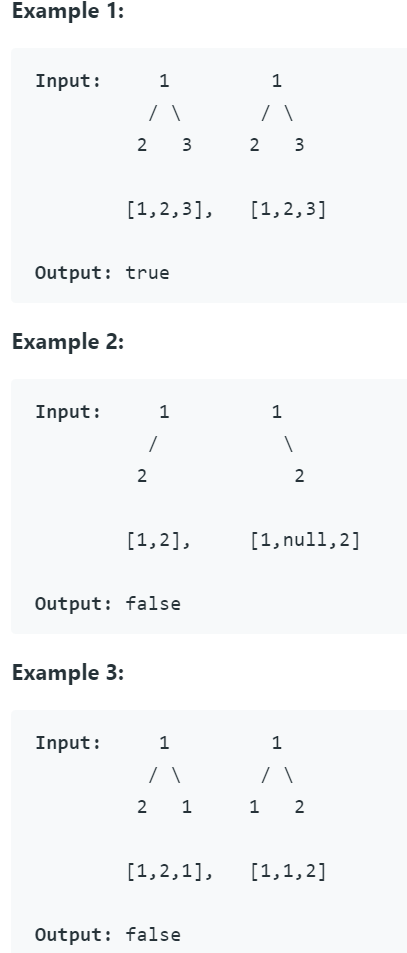

In [5]:
from IPython.display import Image
Image(filename = '100.jpg', width=150, height=50)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
        if not p and not q:
            return True
        if p and q:
            return p.val==q.val and self.isSameTree(p.left,q.left) and self.isSameTree(p.right,q.right)

# 101. Symmetric Tree

Given a binary tree, check whether it is a mirror of itself (ie, symmetric around its center).  
For example, this binary tree [1,2,2,3,4,4,3] is symmetric  
But the following [1,2,2,null,3,null,3] is not

### Idea:
- 需要辅助函数，isSymmetricRecursion来判断
    - 辅助函数
        - 判断左右节点都不存在 >> True
        - 判断只存在一个节点,或者两节点值不相同 >> False
        - 判断两节点都存在且值相同，继续递归辅助函数判断 该左节点的左节点和右节点的右节点，该左节点的右节点和右节点的左节点    

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSymmetric(self, root: TreeNode) -> bool:
        if not root:
            return True
        return self.isSymmetricRecursion(root.left,root.right)
    
    def isSymmetricRecursion(self,left,right):
        if not left and not right:
            return True
        if not left or not right or left.val!=right.val:
            return False
        return self.isSymmetricRecursion(left.left,right.right) and self.isSymmetricRecursion(left.right,right.left)

# 104. Maximum Depth of Binary Tree

Given a binary tree, find its maximum depth.  
The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.  
Note: A leaf is a node with no children.

Example:  
Given binary tree [3,9,20,null,null,15,7],  
return its depth = 3.

### Idea:
- 左子树和右子树最大深度 + root：1
- 递归：每一层只要有左子节点或右子节点就+1

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if not root:
            return 0
        else:
            return max(self.maxDepth(root.left),self.maxDepth(root.right))+1 

# 105. Construct Binary Tree from Preorder and Inorder Traversal

Given preorder and inorder traversal of a tree, construct the binary tree.  
Note: You may assume that duplicates do not exist in the tree.  

For example, given  
preorder = [3,9,20,15,7]  
inorder = [9,3,15,20,7]  
Return the binary tree

### Idea
- pre-order: root > root.left > root.right | 1st: root                 | find the next level root - recurrsion 
- in-order: root.left > root > root.right  | partition root left/right subtree | recurrsion 

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        
        #stop recursion condition
        if not preorder or not inorder:
            return None
        
        # find root
        rootvalue = preorder[0]
        root = TreeNode(rootvalue)
        
        #find root index, partition left/right subtree -> recursion
        inorderIndex = inorder.index(rootvalue)
        
        root.left = self.buildTree(preorder[1:inorderIndex+1], inorder[:inorderIndex])
        root.right = self.buildTree(preorder[inorderIndex+1:], inorder[inorderIndex+1:])
        
        return root        

# 107. Binary Tree Level Order Traversal II

Given a binary tree, return the bottom-up level order traversal of its nodes' values. (ie, from left to right, level by level from leaf to root).  
For example:   
Given binary tree [3,9,20,null,null,15,7],  
return its bottom-up level order traversal as:  
[
  [15,7],  
  [9,20],  
  [3]  ]
  
### Idea:
- curr: current level, intialization -> root
- while loop, curr
    - vals: nodes of current level
    - next_level: left and right of nodes
    - update curr = next_level

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        if not root:
            return []
        result,curr = [], [root]
        while curr:
            next_level, vals = [], []
            for node in curr:
                vals.append(node.val)
                if node.left:
                    next_level.append(node.left)
                if node.right:
                    next_level.append(node.right)
            curr = next_level
            result.append(vals)
        return result[::1]

# 108. Convert Sorted Array to Binary Search Tree - Recursion

Given an array where elements are sorted in ascending order, convert it to a height balanced BST.  
For this problem, a height-balanced binary tree is defined as a binary tree in which the depth of the two subtrees of every node never differ by more than 1.

Example:  
Given the sorted array: [-10,-3,0,5,9],  
One possible answer is: [0,-3,9,-10,null,5], which represents the following height balanced BST:

### Idea:
- height-balanced binary tree: the depth of the two subtrees of every node never differ by more than 1
- helper function:
    - recursion, find the mid node, left part is left-subtree, right part is right-subtree.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> TreeNode:
        
        def to_bst(nums,start,end):
            if start > end:
                return None
            mid = (start + end)//2
            node = TreeNode(nums[mid])
            node.left = to_bst(nums,start,mid-1)
            node.right = to_bst(nums,mid+1,end)
            return node # 把node.left，node.right与subtree相连，linked list
        return to_bst(nums,0,len(nums)-1)

# 110. Balanced Binary Tree

Given a binary tree, determine if it is height-balanced.  
For this problem, **a height-balanced binary tree is defined as:  
a binary tree in which the left and right subtrees of every node differ in height by no more than 1.**

Example 1:  
Given the following tree [3,9,20,null,null,15,7]:  
Return true.

Example 2:  
Given the following tree [1,2,2,3,3,null,null,4,4]:  
Return false.

### Idea:
- main function
    - helper function - getHeight(root)
        - determine every node satisfying the condition, if not, return -1
            - left_height >=0 and right_height >= 0 and abs()<=1
        - return height
    - return root_height >= 0

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: TreeNode) -> bool:
        def getHeight(root):
            if not root:
                return 0
            left_height, right_height = getHeight(root.left),getHeight(root.right)
            if left_height < 0 or right_height < 0 or abs(left_height-right_height) > 1:
                return -1
            return max(left_height,right_height)+1
        return getHeight >= 0

# 111. Minimum Depth of Binary Tree

Given a binary tree, find its minimum depth.  
The minimum depth is the number of nodes along the shortest path from the root node down to the nearest leaf node.    
Note: A leaf is a node with no children.

Example:  
Given binary tree [3,9,20,null,null,15,7],  
return its minimum depth = 2.

### Idea:
- same as maximum Depth problem
- but notice: [0,null,1] >> minDepth=2  *最小深度是从根节点到最近叶子节点的最短路径上的节点数量*
    - if not root.left:  return self.minDepth(root.right)+1
    - if not root.right: return self.minDepth(root.left)+1

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def minDepth(self, root: TreeNode) -> int:
        if not root:
            return 0
        if not root.left:
            return self.minDepth(root.right)+1
        if not root.right:
            return self.minDepth(root.left)+1

        return min(self.minDepth(root.left), self.minDepth(root.right))+1

# 112. Path Sum

Given a binary tree and a sum, determine if the tree has a root-to-leaf path such that adding up all the values along the path equals the given sum.  
Note: A leaf is a node with no children.

Example:  
Given the below binary tree and sum = 22,  
      5  
     / \  
    4   8  
   /   / \  
  11  13  4  
 /  \      \  
7    2      1  
return true, as there exist a root-to-leaf path 5->4->11->2 which sum is 22.

### Idea:
- case1: if root uodate to leaf and leaf.val != updated sum >> False
- case2: if root update to leaf and leaf.val == updated sum >> True
- case3: other cases, root.left or root.right, sum-root.val >> recursion and update sum

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if not root:
            return False
        if not root.left and not root.right and sum = root.val:
            return True
        else:
            return self.hasPathSum(root.left,sum-root.val) or self.hasPathSum(root.right,sum-root.val)

# 116. Populating Next Right Pointers in Each Node

You are given a perfect binary tree where all leaves are on the same level, and every parent has two children. The binary tree has the following definition:  
struct Node {  
  int val;  
  Node *left;  
  Node *right;  
  Node *next;
} 
Populate each next pointer to point to its next right node. If there is no next right node, the next pointer should be set to NULL.  
Initially, all next pointers are set to NULL.

Follow up:  
You may only use constant extra space.  
Recursive approach is fine, you may assume implicit stack space does not count as extra space for this problem.
 
Example 1:  
Input: root = [1,2,3,4,5,6,7]  
Output: [1,#,2,3,#,4,5,6,7,#]  
Explanation: Given the above perfect binary tree (Figure A), your function should populate each next pointer to point to its next right node, just like in Figure B. The serialized output is in level order as connected by the next pointers, with '#' signifying the end of each level.
 
Constraints:  
The number of nodes in the given tree is less than 4096.  
-1000 <= node.val <= 1000


### Idea: -- Recursive Approach
- case1: find node, node.left.next=node.right >> 2-3, 4-5, 6-7
- case 2: if node.next, node.right.next = node.next.left >> 5-6 
- case 3: if node.next, keep null

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next
"""

class Solution:
    def connect(self, root: 'Node') -> 'Node':
        if root and root.left and root.right: #not leaf node
            root.left.next = root.right
            if root.next:
                root.right.next = root.next.left
            self.connect(root.left)
            self.connect(root.right)
        return root #return updated root

# 118. Pascal's Triangle

### Idea
- for loop every row (i-th)
- for loop every num (i+1 nums) of each row 
    - if the first and last index, num = 1
    - else sum of 2 nums of the last row 

In [2]:
def generate(numRows: int):
    result = []
    for i in range(numRows):
        result.append([])
        for j in range(i+1):
            if j in (0,i):
                result[i].append(1)
            else:
                result[i].append(result[i-1][j-1]+result[i-1][j])
    return result                

In [3]:
generate(numRows=5)

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]

# 119. Pascal's Triangle II

Given a non-negative index k where k ≤ 33, return the kth index row of the Pascal's triangle.  
Note that the row index starts from 0.

## Idea
- set the result format
- traversal every row
- traversal every num in each row, backwards sum

In [11]:
def getRow(rowIndex: int):
    result = [1] + [0]*rowIndex
    for i in range(rowIndex):
        result[0] = 1
        for j in range(i+1,0,-1):
            result[j] = result[j] + result[j-1]
            print("i:",i,"j:",j,result)
    return result

In [12]:
getRow(rowIndex=3)

i: 0 j: 1 [1, 1, 0, 0]
i: 1 j: 2 [1, 1, 1, 0]
i: 1 j: 1 [1, 2, 1, 0]
i: 2 j: 3 [1, 2, 1, 1]
i: 2 j: 2 [1, 2, 3, 1]
i: 2 j: 1 [1, 3, 3, 1]


[1, 3, 3, 1]

# 121. Best Time to Buy and Sell Stock    

Say you have an array for which the ith element is the price of a given stock on day i.

If you were only permitted to complete at most one transaction (i.e., buy one and sell one share of the stock), design an algorithm to find the maximum profit.

Note that you cannot sell a stock before you buy one.

Example 1:  
Input: [7,1,5,3,6,4]   
Output: 5  
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
         Not 7-1 = 6, as selling price needs to be larger than buying price.

Example 2:  
Input: [7,6,4,3,1]  
Output: 0  
Explanation: In this case, no transaction is done, i.e. max profit = 0.

In [1]:
def maxProfit(prices) -> int:
    max_profit,min_price = 0, float('inf')
    for price in prices:
        min_price = min(min_price,price)
        max_profit = max(max_profit,price-min_price)
    return max(0,max_profit)

In [27]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

7 7 0
1 1 0
5 1 4
3 1 4
6 1 5
4 1 5


5

# 125. Valid Palindrome - 有效回文 - 正向反向是否相同

Given a string, determine if it is a palindrome, considering only alphanumeric characters and ignoring cases.  
Note: For the purpose of this problem, we define empty string as valid palindrome.

Example 1:  
Input: "A man, a plan, a canal: Panama"  
Output: true  
    
Example 2:  
Input: "race a car"  
Output: false

### Idea:
- 2 pointers
- judge whether it is a num or alpha
- there is no diff between lowercase and uppercase in this question

In [113]:
def isPalindrome(s: str) -> bool:
    
    if not str:
        return True
    i, j = 0, len(s)-1
    while i < j:
        while i < j and not s[i].isalnum():
            i += 1
        while i < j and not s[j].isalnum():
            j -= 1
        if s[i].lower() != s[j].lower():
            return False
        i += 1
        j -= 1
    return True

In [116]:
s = "A man, a plan, a canal: Panama"
isPalindrome(s)
s = "race a car"
isPalindrome(s)

True

False

# 134. Gas Station

There are N gas stations along a circular route, where the amount of gas at station i is gas[i].  
You have a car with an unlimited gas tank and it costs cost[i] of gas to travel from station i to its next station (i+1). You begin the journey with an empty tank at one of the gas stations.  
Return the starting gas station's index if you can travel around the circuit once in the clockwise direction, otherwise return -1.

Note:  
If there exists a solution, it is guaranteed to be unique.  
Both input arrays are non-empty and have the same length.  
Each element in the input arrays is a non-negative integer.

Example 1:  
Input:   
gas  = [1,2,3,4,5]  
cost = [3,4,5,1,2]    
Output: 3

Explanation:  
Start at station 3 (index 3) and fill up with 4 unit of gas. Your tank = 0 + 4 = 4  
Travel to station 4. Your tank = 4 - 1 + 5 = 8  
Travel to station 0. Your tank = 8 - 2 + 1 = 7   
Travel to station 1. Your tank = 7 - 3 + 2 = 6  
Travel to station 2. Your tank = 6 - 4 + 3 = 5  
Travel to station 3. The cost is 5. Your gas is just enough to travel back to station 3.  
Therefore, return 3 as the starting index.

Example 2:  
Input:   
gas  = [2,3,4]  
cost = [3,4,3]    
Output: -1

Explanation:  
You can't start at station 0 or 1, as there is not enough gas to travel to the next station.  
Let's start at station 2 and fill up with 4 unit of gas. Your tank = 0 + 4 = 4  
Travel to station 0. Your tank = 4 - 3 + 2 = 3  
Travel to station 1. Your tank = 3 - 3 + 3 = 3  
You cannot travel back to station 2, as it requires 4 unit of gas but you only have 3.  
Therefore, you can't travel around the circuit once no matter where you start.

### My solution:

In [33]:
def canCompleteCircuit(gas, cost) -> int:
    
    def circle(gas,cost):
        tank = 0
        for j in range(len(gas)):
            tank += gas[j]
            tank -= cost[j]
            if tank < 0:
                return False
        return True
    
    for i in range(len(gas)):
        tmp1 = gas
        tmp2 = cost
        gas1 = tmp1[i:]+tmp1[:i]
        cost1 = tmp2[i:]+tmp2[:i]
        if circle(gas1,cost1) == True:
            return i
    return -1
                
gas = [1,2,3,4,5]
cost = [3,4,5,1,2]            
canCompleteCircuit(gas, cost)
gas = [5,1,2,3,4]
cost = [4,4,1,5,1]           
canCompleteCircuit(gas, cost)

3

4

In [50]:
def canCompleteCircuit(gas, cost) -> int:
    if sum(gas) < sum(cost):
        return -1

    start, remain = 0, 0
    for i in range(len(gas)):
        if gas[i]+remain<cost[i]:
            start = i+1
            remain = 0
            print(i,start,remain)
        else:
            remain += gas[i]-cost[i]
    return start
gas = [1,2,3,4,5]
cost = [3,4,5,1,2]            
canCompleteCircuit(gas, cost)

0 1 0
1 2 0
2 3 0


3

### 136. Single Number - XOR

Given a non-empty array of integers, every element appears twice except for one. Find that single one.    
Note: Your algorithm should have a linear runtime complexity. Could you implement it without using extra memory?

Example 1:  
Input: [2,2,1]  
Output: 1

Example 2:  
Input: [4,1,2,1,2]  
Output: 4

In [ ]:
def singleNumber(nums) -> int:
        r = 0
        for i in nums:
            r ^= i
        return r    

# 141. Linked List Cycle

Given a linked list, determine if it has a cycle in it.  
To represent a cycle in the given linked list, we use an integer pos which represents the position (0-indexed) in the linked list where tail connects to. If pos is -1, then there is no cycle in the linked list 

Example 1:  
Input: head = [3,2,0,-4], pos = 1  
Output: true  
Explanation: There is a cycle in the linked list, where tail connects to the second node.

Example 2:  
Input: head = [1,2], pos = 0  
Output: true  
Explanation: There is a cycle in the linked list, where tail connects to the first node.

Example 3:  
Input: head = [1], pos = -1  
Output: false  
Explanation: There is no cycle in the linked list.

### idea: 2pointers: 1 fast + 1 slow, if they will meet - cycle. 

In [ ]:
def hasCycle(self, head: ListNode) -> bool:
    fast, slow = head, head
    while fast and fast.next:
        fast, slow = fast.next.next, slow.next
        if fast == slow:
            return True
    return False

# 151. Reverse Words in a String

Given an input string, reverse the string word by word.  

Example 1:   
Input: "the sky is blue"  
Output: "blue is sky the"

Example 2:    
Input: "  hello world!  "  
Output: "world! hello"  
Explanation: Your reversed string should not contain leading or trailing spaces.

Example 3:  
Input: "a good   example"  
Output: "example good a"  
Explanation: You need to reduce multiple spaces between two words to a single space in the reversed string.
 
Note:  
A word is defined as a sequence of non-space characters.  
Input string may contain leading or trailing spaces. However, your reversed string should not contain leading or trailing spaces.  
You need to reduce multiple spaces between two words to a single space in the reversed string.

Follow up:  
For C programmers, try to solve it in-place in O(1) extra space.

### My solution - reversed(s.split())

In [55]:
def reverseWords(s) -> str:
    t = ""
    for i in reversed(s.split()):
        t += i + ' '
    return t[:-1]

In [67]:
def reverseWords(s:str) -> str:
    if s == "":
        return s
    ls = s.split()
    
    if ls == []:
        return ""
    result = ""
    for i in range(0,len(ls)-1):
        result += ls[len(ls)-i-1] + " "
    result += ls[0]
    return result

In [68]:
s = "the sky is blue"
reverseWords(s)
s = "a good example"
reverseWords(s)
s = " hello world! "
reverseWords(s)

'blue is sky the'

'example good a'

'world! hello'

# 153. Find Minimum in Rotated Sorted Array -- Array, Binary Search

Suppose an array sorted in ascending order is rotated at some pivot unknown to you beforehand.  
(i.e.,  [0,1,2,4,5,6,7] might become  [4,5,6,7,0,1,2]).

Find the minimum element.  
You may assume no duplicate exists in the array.

Example 1:  
Input: [3,4,5,1,2]   
Output: 1 

Example 2:  
Input: [4,5,6,7,0,1,2]  
Output: 0

### My Solution
- special case: len(nums) == 1
- if nums[mid] > nums[end] >> left is sorted  >> move right to find the trough of the nums
-              else  >> right is sorted >> move left

In [5]:
def findMin(nums) -> int:

    if len(nums) == 1:
        return nums[0]

    start, end = 0,len(nums)-1
    while start <= end:
        mid = (start + end)//2

        if nums[mid] > nums[end]:
            if nums[mid] > nums[mid+1]:
                return nums[mid+1]
            start = mid + 1
        else:
            if nums[mid] < nums[mid-1]:
                return nums[mid]
            end = mid - 1    

In [18]:
### Solution 2
def findMin2(nums) -> int:
    if nums == []:
        return
    left,right = 0,len(nums)-1
    result = nums[0]
    
    while left <= right:
        mid = (left+right)//2
        if nums[mid] >= nums[left]:
            result = min(result,nums[left])
            left = mid + 1
        else:
            result = min(result,nums[mid])
            right = mid -1

In [19]:
nums = [3,4,5,1,2]
%timeit findMin(nums)
%timeit findMin2(nums)

677 ns ± 106 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.67 µs ± 93.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# 160. Intersection of Two Linked Lists

### Idea: 2 pointers: p1,p2
- p1空，继续B，p2空，继续A，直到重合 >> 返回 intersection
- 或者链表都结束为 None >> 返回 None 

In [5]:
def getIntersectionNode(headA, headB):
    p1, p2 = headA, headB
    while p1 != p2:
        if not p1:
            p1 = headB
        else:
            p1 = p1.next
        if not p2:
            p2 = headA
        else:
            p2 = p2.next
    return p2

# 162. Find Peak Element

A peak element is an element that is greater than its neighbors.  
Given an input array nums, where nums[i] ≠ nums[i+1], find a peak element and return its index.  
The array may contain multiple peaks, in that case return the index to any one of the peaks is fine.  
You may imagine that nums[-1] = nums[n] = -∞.

Example 1:  
Input: nums = [1,2,3,1]  
Output: 2  
Explanation: 3 is a peak element and your function should return the index number 2.

Example 2:  
Input: nums = [1,2,1,3,5,6,4]  
Output: 1 or 5   
Explanation: Your function can return either index number 1 where the peak element is 2, or index number 5 where the peak element is 6.

### Brute-Force 

In [48]:
def findPeakElement(nums) -> int:
    length = len(nums)
    for i in range(1,length-1):
        if nums[i-1]<nums[i] and nums[i]>nums[i+1]:
            return i
    return [0,length-1][nums[0]<nums[length-1]]

### Binary Search

In [46]:
def findPeakElement2(nums) -> int:
    left,right = 0,len(nums)-1 
    while left < right:
        mid = (left+right)//2
        if nums[mid] < nums[mid+1]: #ascending
            left = mid + 1            
        else:
            right = mid #descending
    return left

In [47]:
nums = [1,2,1,3,5,6,4]
findPeakElement2(nums)

5

# 165. Compare Version Numbers
  
Compare two version numbers version1 and version2.  
If version1 > version2 return 1; if version1 < version2 return -1;otherwise return 0.  

You may assume that the version strings are non-empty and contain only digits and the . character.  
The . character does not represent a decimal point and is used to separate number sequences.  
For instance, 2.5 is not "two and a half" or "half way to version three", it is the fifth second-level revision of the second first-level revision.  
You may assume the default revision number for each level of a version number to be 0. For example, version number 3.4 has a revision number of 3 and 4 for its first and second level revision number. Its third and fourth level revision number are both 0.

Example 1:  
Input: version1 = "0.1", version2 = "1.1"  
Output: -1

Example 2:  
Input: version1 = "1.0.1", version2 = "1"  
Output: 1 

Example 3:  
Input: version1 = "7.5.2.4", version2 = "7.5.3"  
Output: -1 

Example 4:  
Input: version1 = "1.01", version2 = "1.001"  
Output: 0  
Explanation: Ignoring leading zeroes, both “01” and “001" represent the same number “1”
Example 5:

Input: version1 = "1.0", version2 = "1.0.0"
Output: 0
Explanation: The first version number does not have a third level revision number, which means its third level revision number is default to "0"

Note:  
Version strings are composed of numeric strings separated by dots . and this numeric strings may have leading zeroes.  
Version strings do not start or end with dots, and they will not be two consecutive dots.

### My Solution 
- 长度不同，补位 e.g.1和1.1
- 其他遍历比较int值

In [110]:
def compareVersion(version1: str, version2: str) -> int:
    '''
    If version1 > version2 
        return 1; 
    if version1 < version2 
        return -1;
    otherwise return 0.
    '''
    v1 = version1.split('.')
    v2 = version2.split('.')
    len_diff = len(v1) - len(v2)
    if len_diff > 0:
        v2 += '0'*len_diff
    elif len_diff < 0:
        v1 +='0'*(-len_diff)
    for i in range(min(len(v1),len(v2))):
        if not v1[i]:
            v1[i] = '0'
        if not v2[i]:
            v2[i] = '0'
        if int(v1[i]) > int(v2[i]):
            return 1
        elif int(v1[i]) < int(v2[i]):
            return -1
    return 0

In [111]:
version1 = "0.1"
version2 = "1.1"
compareVersion(version1, version2)
version1 = "1.0.1"
version2 = "1"
compareVersion(version1, version2)
version1 = "7.5.2.4"
version2 = "7.5.3"
compareVersion(version1, version2)
version1 = "1.01"
version2 = "1.001"
compareVersion(version1, version2)
version1 = "1."
version2 = "1.1"
v1 = version1.split('.')
v2 = version2.split('.')
compareVersion(version1, version2)

-1

1

-1

0

-1

# 166. Fraction to Recurring Decimal

Given two integers representing the numerator and denominator of a fraction, return the fraction in string format.  
If the fractional part is repeating, enclose the repeating part in parentheses.  

Example 1:  
Input: numerator = 1, denominator = 2  
Output: "0.5"  

Example 2:  
Input: numerator = 2, denominator = 1  
Output: "2" 

Example 3:  
Input: numerator = 2, denominator = 3  
Output: "0.(6)"

### Idea:
- consder negative sign '-'
- only integer 
- non-repeating part
- repeating part: loopDict,loopStr

In [12]:
def fractionToDecimal(numerator: int, denominator: int) -> str:
    # numerator/denominator: -+,+-,--
    #nagativeFlag
    negativFlag = numerator * denominator < 0
    numerator = abs(numerator)
    denominator = abs(denominator)
    
    numlist = []
    cnt = 0
    loopDict = [] # find whether it is repeating or not
    loopStr = None # store the repeating fractional part
    
    while True:
        numlist.append(str(numerator//denominator)) #store integer
        cnt += 1 #times until finding the repeating num
        numerator = 10 * (numerator%denominator) 
        if numerator == 0: # exact division
            break 
        loc = loopDict.get(numerator) # if repeatinf numerator, so repeating result.
        if loc:
            loopStr = ''.join(numlist[loc:cnt])
            break
        loopDict[numerator] = cnt
    ans = numlist[0] # integer part
    if len(numlist)>1:
        ans += '.'
    if loopStr:
        ans += "".join(numlist[1:len(numlist)-len(loopStr)]) + '(' + loopStr + ')'
    else:
        ans += "".join(numlist[1:])
    if negativeFlag:
        ans = '-' + ans
    return ans
    
        

# 167. Two Sum II - Input array is sorted

Given an array of integers that is already sorted in ascending order, find two numbers such that they add up to a specific target number.  
The function twoSum should return indices of the two numbers such that they add up to the target, where index1 must be less than index2.

Note:  
Your returned answers (both index1 and index2) are not zero-based.
You may assume that each input would have exactly one solution and you may not use the same element twice.

Example:  
Input: numbers = [2,7,11,15], target = 9  
Output: [1,2]  
Explanation: The sum of 2 and 7 is 9. Therefore index1 = 1, index2 = 2.

### My Solution -- same as Two Sum I -- dictionary

In [51]:
def twoSum(numbers, target):
    d = {}
    for i in range(len(numbers)):
        if numbers[i] in d:
            return d[numbers[i]]+1,i+1
        else:
            d[target-numbers[i]] = i

### Solution2 -- Binary Search

In [65]:
def twoSum2(numbers, target):
    start = 0
    end = len(numbers)-1
    sum = 0
    
    while start != end:
        sum = numbers[start] + numbers[end]
        if sum > target:
            end -= 1
        elif sum < target:
            start += 1
        else:
            return (start+1, end+1)
numbers = [2,7,11,15]
target = 9
twoSum2(numbers, target)

# 168. Excel Sheet Column Title

Given a positive integer, return its corresponding column title as appear in an Excel sheet.  
For example:  
    1 -> A  
    2 -> B  
    3 -> C  
    ...  
    26 -> Z  
    27 -> AA  
    28 -> AB   
    ...  
Example 1:  
Input: 1  
Output: "A" 

Example 2:  
Input: 28  
Output: "AB"  

Example 3:  
Input: 701  
Output: "ZY"  

In [27]:
def convertToTitle(n: int) -> str:
    res = ""
    while n:
        res += chr((n-1)%26 + ord('A'))
        n = (n-1) // 26
    return res[::-1] #take mod firstly, so reverse result at last

convertToTitle(n=701)

'ZY'

# 169. Majority Element

Given an array of size n, find the majority element. The majority element is the element that appears more than ⌊ n/2 ⌋ times.  
You may assume that the array is non-empty and the majority element always exist in the array.

Example 1:  
Input: [3,2,3]  
Output: 3  

Example 2:  
Input: [2,2,1,1,1,2,2]  
Output: 2 

### My Solution -- collections.Counter

In [ ]:
def majorityElement(nums) -> int:
    from collections import Counter 
    d = Counter(nums)
    for num in nums:
        if d[num] > len(nums)/2:
            return num

### Solution 2
- Idea: (#of majority - #of minority) > 0

In [ ]:
def majorityElement(nums) -> int:
    index,cnt = 0,1
    for i in range(1,len(nums)):
        if nums[index] == nums[i]:
            cnt += 1
        else:
            cnt -= 1
            if cnt == 0:
                index = i
                cnt = 1
    return nums[index]

'''
nums = [3,2,3]
index = 0
i=1,nums[0]=3 != nums[1]=2, cnt=0,index=1,cnt=1
i=2,nums[1]=2 != nums[2]=3, cnt=0,index=2,cnt=1
'''
    
# Time Complexity O(n)
# Space Complexity O(1)

# 171. Excel Sheet Column Number

Given a column title as appear in an Excel sheet, return its corresponding column number. 
For example:  
    A -> 1  
    B -> 2  
    C -> 3  
    ...  
    Z -> 26  
    AA -> 27  
    AB -> 28   
    ...  
Example 1:  
Input: "A"  
Output: 1 
    
Example 2:  
Input: "AB"  
Output: 28
    
Example 3:  
Input: "ZY"  
Output: 701

In [9]:
def titleToNumber(s: str) -> int:
    res = 0
    for i in range(len(s)):
        res *= 26
        res += (ord(s[i])-ord('A')+1)
    return res
titleToNumber(s="ZY")
# Z:25+1=26
# 26*26 = 676,Y = 24+1=25

701

# 172. Factorial Trailing Zeroes

Given an integer n, return the number of trailing zeroes in n!.  
Example 1:    
Input: 3  
Output: 0  
Explanation: 3! = 6, no trailing zero.
    
Example 2:  
Input: 5  
Output: 1  
Explanation: 5! = 120, one trailing zero.
Note: Your solution should be in **logarithmic time complexity**.

### Idea:
- num of trailing zeros: 
- 2*5=10
- 2 easy to capture
- num of 5  -> # of 10 (25=5*5)

In [ ]:
def trailingZeroes(n: int) -> int:
    res = 0
    when n != 0:
        res += n // 5
        n = n // 5
    return res

# 186. Reverse Words in a String II 

Given an input string, reverse the string word by word. A word is defined as a sequence of non-space characters.  
The input string does not contain leading or trailing spaces and the words are always separated by a single space.  

For example  
Given s = "the sky is blue",    
return "blue is sky the".  
Could you do it **in-place without allocating extra space**?

### Idea：swap
- 1. swap by char
- 2. find space " ", swap by word

In [152]:
def reverseWords(s):
    start, end = 0, len(s)-1
    while start < end:
        s[start],s[end] = s[end],s[start]
        start += 1
        end -= 1
    index = 0
    start = 0
    while index < len(s):
        if s[index] == ' ' or index == len(s)-1:
            if index == len(s)-1: #end of s ang of word
                end = index
            else:
                end = index -1
            while start < end:
                s[start],s[end] = s[end],s[start]
                start += 1
                end -= 1
            start = index + 1
        index += 1
    return s

s = ['t','h','e',' ','s','k','y',' ','i','s',' ','b','l','u','e']
reverseWords(s)

# 189. Rotate Array

Given an array, rotate the array to the right by k steps, where k is non-negative.  
Follow up:    
Try to come up as many solutions as you can, there are at least 3 different ways to solve this problem.
Could you do it in-place with O(1) extra space?

Example 1:  
Input: nums = [1,2,3,4,5,6,7], k = 3  
Output: [5,6,7,1,2,3,4]  
Explanation:  
rotate 1 steps to the right: [7,1,2,3,4,5,6]  
rotate 2 steps to the right: [6,7,1,2,3,4,5]  
rotate 3 steps to the right: [5,6,7,1,2,3,4]  

Example 2:  
Input: nums = [-1,-100,3,99], k = 2  
Output: [3,99,-1,-100]  
Explanation:   
rotate 1 steps to the right: [99,-1,-100,3]  
rotate 2 steps to the right: [3,99,-1,-100]  
 
Constraints:  
1 <= nums.length <= 2 * 10^4  
It's guaranteed that nums[i] fits in a 32 bit-signed integer.  
k >= 0

In [ ]:
def rotate(nums, k: int) -> None:
    k = k % len(nums)
    nums[:k],nums[k:] = nums[-k:],nums[:len(nums)-k]
    return nums
nums = [1,2,3,4,5,6,7]
rotate(nums, 3)

# 190. Reverse Bits
Reverse bits of a given 32 bits unsigned integer.  

Example 1:  
Input: 00000010100101000001111010011100  
Output: 00111001011110000010100101000000  
Explanation: The input binary string 00000010100101000001111010011100 represents the unsigned integer 43261596, so return 964176192 which its binary representation is 00111001011110000010100101000000.

Example 2:  
Input: 11111111111111111111111111111101  
Output: 10111111111111111111111111111111  
Explanation: The input binary string 11111111111111111111111111111101 represents the unsigned integer 4294967293, so return 3221225471 which its binary representation is 10111111111111111111111111111111.

Note:  
Note that in some languages such as Java, there is no unsigned integer type. In this case, both input and output will be given as signed integer type and should not affect your implementation, as the internal binary representation of the integer is the same whether it is signed or unsigned.  
In Java, the compiler represents the signed integers using 2's complement notation. Therefore, in Example 2 above the input represents the signed integer -3 and the output represents the signed integer -1073741825.
 
Follow up: If this function is called many times, how would you optimize it?

In [12]:
def reverseBits(n: int) -> int:
    b = bin(n)[:1:-1]
    return int(b + '0'*(32-len(b)),2)
n = 43261596
reverseBits(n)

964176192

In [14]:
def reverseBits(n: int) -> int:
    res = 0
    for i in range(32):
        res <<= 1
        res |= ((n >> i) & 1)
    return res
n = 43261596
reverseBits(n)

964176192

In [16]:
def reverseBits(n: int) -> int:
    str="{0:032b}".format(n)
    print(str)
    reverse=str[::-1]
    return int(reverse, 2)
n = 43261596
reverseBits(n)

00000010100101000001111010011100


964176192

# 198. House Robber

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security system connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given a list of non-negative integers representing the amount of money of each house, determine the maximum amount of money you can rob tonight without alerting the police.

Example 1:  
Input: nums = [1,2,3,1]  
Output: 4  
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).Total amount you can rob = 1 + 3 = 4.

Example 2:  
Input: nums = [2,7,9,3,1]  
Output: 12  
Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).Total amount you can rob = 2 + 9 + 1 = 12.
 
Constraints:  
0 <= nums.length <= 100  
0 <= nums[i] <= 400

### Idea:
- current maximum money money[i] = max(money[i-1],money[i-2]+nums[i])

In [24]:
def rob(nums) -> int:
    last, now = 0, 0
    for num in nums:
        last, now = now, max(last+num,now)
        print(last,now)
nums = [2,7,9,3,1]
rob(nums)

0 2
2 7
7 11
11 11
11 12


12

In [33]:
#ERROR#
def rob(nums) -> int:
    if nums==[]:
        return 0
    if len(nums)==1:
        return nums[0]
    dp = [0]*len(nums)
    dp[0] = nums[0]
    dp[1] = max(nums[1],nums[0])
    for i in range(2,len(nums)):
        dp[i] = max(dp[i-1],dp[i-2]+nums[i])
    return dp[-1]
nums = [2,7,9,3,1]
nums = [1,2,3,1]
rob(nums)    

4

# 203. Remove Linked List Elements

Remove all elements from a linked list of integers that have value val.

Example:  
Input:  1->2->6->3->4->5->6, val = 6  
Output: 1->2->3->4->5

### Idea:
- initialize dummy虚表头, define prev,curr pointters
- while loop
    - case 1: curr = val
        - update prev.next
    - case e2 : curr != val 
        - update prev.next
    - update curr.next

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeElements(self, head: ListNode, val: int) -> ListNode:
        dummy = ListNode(0)
        dummy.next = head
        prev, curr = dummy,dummy.next
        while curr:
            if curr.val == val:
                prev.next = curr.next
            else:
                prev = curr
            curr = curr.next
        return dummy.next

# 204. Count Primes

Count the number of prime numbers less than a non-negative number, n.
Example:  
Input: 10  
Output: 4  
Explanation: There are 4 prime numbers less than 10, they are 2, 3, 5, 7.

### Idea:
- go over each number less than n
- [0,1,2,3,4,5,6,7,8,9]
- [F,F,T,None,F..]
    - 2 is prime number, and chage multiple times of 2 to F, it means 4,6,8 = False by using a for loop(start,end,interval)

In [20]:
def countPrimes(n: int) -> int:
    if n <= 1:
        return 0
    
    nums = [None] * n
    #nums = [0,1,2,3,4,5,...]
    #nums = [F,F,]
    nums[0], nums[1] = False, False
    for i in range(2,n):
        if nums[i] == None:
            nums[i] = True
            for j in range(i+i,n,i):
                nums[j] = False
    return sum(nums)

countPrimes(n=10)

4

# 205. Isomorphic Strings

Given two strings s and t, determine if they are isomorphic.  
Two strings are isomorphic if the characters in s can be replaced to get t.  
All occurrences of a character must be replaced with another character while preserving the order of characters. No two characters may map to the same character but a character may **map** to itself. 

Example 1:  
Input: s = "egg", t = "add"  
Output: true  

Example 2:  
Input: s = "foo", t = "bar"  
Output: false

Example 3:  
Input: s = "paper", t = "title"  
Output: true

### Idea:
- mapping -> dictionary
- go over each char, and record char in s and its replacement in t. 
    - make sure 2 diff chars donot have same replacement.
    - make sure same char in s should have same replacement in t.

In [12]:
def isIsomorphic(s: str, t: str) -> bool:
    d = {}
    for i in range(len(s)):
        if not d.get(s[i]):
            if t[i] in d.values():
                return False
            d[s[i]] = t[i]
        else:
            if d[s[i]] != t[i]:
                return False
    return True

s = "ab"; t = "aa"
isIsomorphic(s, t)
s = "paper"; t = "title"   
isIsomorphic(s,t)

False

True

# 206. Reverse Linked List

Reverse a singly linked list.

Example:  
Input: 1->2->3->4->5->NULL    
Output: 5->4->3->2->1->NULL    
Follow up: A linked list can be reversed either iteratively or recursively. Could you implement both?

### Idea:
- iteration1: dummy > head = 1 > None, uppdate head
- iteration2: dummy > head = 2 > head = 1 > None, update head
- ...

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        dummy = ListNode(float('-inf')) # dummy.next = None 
        while head:
            dummy.next, head.next, head = head, dummy.next, head.next
        return dummy.next

# 217. Contains Duplicate

Given an array of integers, find if the array contains any duplicates.  
Your function should return true if any value appears at least twice in the array, and it should return false if every element is distinct.  
Example 1:  
Input: [1,2,3,1]  
Output: true  

Example 2:  
Input: [1,2,3,4]  
Output: false  

Example 3: 
Input: [1,1,1,3,3,4,3,2,4,2]  
Output: true

### My Solution

In [152]:
def containsDuplicate(nums) -> bool:
    d = {}
    for i in range(len(nums)):
        if nums[i] not in d:
            d[nums[i]] = 1
        else:
            return True
    return False

In [83]:
def containsDuplicate(nums):
    from collections import Counter
    nums_counter = Counter(nums)
    for i in nums_counter:
        if nums_counter[i] > 1:
            return True
    return False

### Solution2 - sort(), for loop nums[i+1] == nums[i]

In [85]:
def containsDuplicate(nums):
    nums.sort()
    for i in range(len(nums)-1):
        if nums[i+1] == nums[i]:
            return True
    return False

In [86]:
nums =  [1,1,1,3,3,4,3,2,4,2]
containsDuplicate(nums)

True

# 219. Contains Duplicate II

Given an array of integers and an integer k, find out whether there are two distinct indices i and j in the array such that nums[i] = nums[j] and the absolute difference between i and j is at most k.

Example 1:  
Input: nums = [1,2,3,1], k = 3  
Output: true  

Example 2:  
Input: nums = [1,0,1,1], k = 1  
Output: true  

Example 3:  
Input: nums = [1,2,3,1,2,3], k = 2  
Output: false

### My Solution - comlicated

In [149]:
def containsNearbyDuplicate(nums, k:int) -> bool:
    from collections import defaultdict
    d = defaultdict(list)
    for i in range(len(nums)):
        d[str(nums[i])].append(i)  
    for j in d:
        if len(d[j])>1:
            for m in range(len(d[j])):
                for n in range(m+1,len(d[j])):
                    if abs(d[j][m] - d[j][n]) <= k:
                        return True
    return False

In [153]:
def containsNearbyDuplicate2(nums, k:int):
    lookup = {}
    for i,num in enumerate(nums):
        if num not in lookup:
            lookup[num] = i
        else:
             if (i - lookup[num]) <= k:
                return True
    return False

In [154]:
nums = [1,2,3,1,2,3]
k = 2
containsNearbyDuplicate2(nums, k)

False

# 223. Rectangle Area

Find the total area covered by two rectilinear rectangles in a 2D plane.  
Each rectangle is defined by its bottom left corner and top right corner as shown in the figure.

Example:  
Input: A = -3, B = 0, C = 3, D = 4, E = 0, F = -1, G = 9, H = 2  
Output: 45  
Note: Assume that the total area is never beyond the maximum possible value of int.

### Idea:
- check overlap area
- sum area of 2 rectangles - overlap area

In [ ]:
def computeArea(self, A: int, B: int, C: int, D: int, E: int, F: int, G: int, H: int) -> int:
        overlap = max(min(C,G)-max(A,E),0) * max(min(D,H)- max(B,F),0)
        return (A-C)*(B-D) + (E-G)*(F-H) - overlap

# 229. Majority Element II

Given an integer array of size n, find all elements that appear more than ⌊ n/3 ⌋ times.  
Note: The algorithm should **run in linear time and in O(1) space**.  

Example 1:  
Input: [3,2,3]  
Output: [3]

Example 2:  
Input: [1,1,1,3,3,2,2,2]  
Output: [1,2]

### My solution 
1. collections.Counter
2. dict
3. find 2 nums which is show up most. count it whether it is over len/3

In [39]:
def majorityElement(nums):
    result = []
    from collections import Counter
    numsCounter = Counter(nums)
    numsCounter
    for i in numsCounter:
        if numsCounter[i] > len(nums)/3:
            result.append(i)
    return result

#Runtime: 120 ms, faster than 73.81% of Python3 online submissions for Majority Element II.
#Memory Usage: 15.1 MB, less than 5.88% of Python3 online submissions for Majority Element II.

def majorityElement2(nums):
    d = {}
    result = []
    for i in nums:
        if i not in result:
            if i not in d:
                d[i] = 1
            else:
                d[i] += 1
            if d[i] > len(nums)/3:
                result.append(i)
            if len(result) > 1:
                break
    return result

In [45]:
def majorityElement3(nums):
    num1, num2 = 0, 0 # an most 2 results
    c1,c2 = 0, 0
    result = []
    for i in nums:
        if i == num1:
            c1 += 1
        elif i == num2:
            c2 += 1
        elif c1 == 0: # iniitalization value assignment
            num1 = i
            c1 = 1
        elif c2 == 0:
            num2 = i
            c2 = 1
        else:       #case: when there is a num over num1 and num2 
            c1 -= 1
            c2 -= 1

    c1, c2 = 0, 0
    for j in nums:
        if j == num1:
            c1 += 1
        elif j == num2:
            c2 += 1
    l = len(nums)
    if c1 > l//3:
        result.append(num1)
    if c2 > 1//3:
        result.append(num2)
    return result

In [47]:
def majorityElement4(nums):
    return [value for value in set(nums) if nums.count(value) > int(len(nums)/3)]

In [48]:
nums = [1,1,1,3,3,2,2,2]
majorityElement4(nums)

[1, 2]

# 234. Palindrome Linked List

Given a singly linked list, determine if it is a palindrome. 
Example 1:    
Input: 1->2  
Output: false  
    
Example 2:  
Input: 1->2->2->1  
Output: true  
Follow up: Could you do it in O(n) time and O(1) space?

### Idea: find center by fast+slow 2pointers + stack[]
- while loop:
    - find center by fast+slow 2pointers
    - store every slow to stack
- notice: if len = even, slow move one step
- while loop
    - stack.pop compare to slow
        - if not equal >>  False
        - else >> True

In [ ]:
def isPalindrome(self, head: ListNode) -> bool:
    fast = slow = ListNode(0)
    fast = slow = head
    stack = []
    # find center line by fast and slow pointers
    while fast and fast.next:
        stack.append(slow.val)
        slow = slow.next
        fast = fast.next.next
    if fast:
        slow = slow.next
    while slow:
        top = stack.pop()
        if top != slow.val:
            return Flase
        slow = slow.next
    return True

# 235. Lowest Common Ancestor of a Binary Search Tree

Given a binary search tree (BST), find the lowest common ancestor (LCA) of two given nodes in the BST.  
According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”  
Given binary search tree:  root = [6,2,8,0,4,7,9,null,null,3,5]

Example 1:  
Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 8  
Output: 6  
Explanation: The LCA of nodes 2 and 8 is 6.

Example 2:  
Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 4  
Output: 2  
Explanation: The LCA of nodes 2 and 4 is 2, since a node can be a descendant of itself according to the LCA definition.
 
Note:  
All of the nodes' values will be unique.  
p and q are different and both values will exist in the BST.  

### Idea:
- utilize properties of BST
- initailize a pointer
- while loop
    - if p and q > root.val >> update pointer to right subtree
    - if p and q < root.val >> update pointer to left subtree
    - other cases: return pointer (e.g. one of them > root.val and the other one < root.val OR p or q == root.val)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        pointer = root
        while pointer:
            if p.val > root.val and q.val > root.val:
                pointer = pointer.right
            elif p.val < root.val and q.val < root.val:
                pointer = pointer.left
            else:
                return pointer

# 242. Valid Anagram    

Given two strings s and t , write a function to determine if t is an anagram of s.

Example 1:  
Input: s = "anagram", t = "nagaram"  
Output: true  

Example 2:  
Input: s = "rat", t = "car"  
Output: false  

Note: You may assume the string contains only lowercase alphabets.

## Idea - same times every letter show in 2 strs
### My Solution -  collections.Counter

In [2]:
def isAnagram(s: str, t: str) -> bool:
    from collections import Counter
    if Counter(s) == Counter(t):
        return True
    else:
        return False

### My Solution -  dict

In [5]:
def isAnagram(s: str, t: str) -> bool:
    lookup = {}
    for i in s:
        if i not in lookup:
            lookup[i] = 1
        else:
            lookup[i] += 1
            
    for j in t:
        if j not in lookup:
            return False
        else:        
            lookup[j] -=1
    for k in lookup:
        if lookup[k] != 0:
            return False
    return True

# 243. Shortest Word Distance

Given a list ot words and two words word1 and word2, return the shortest distance between these two words in the list.  

Example:   
Assume that words = ("practice", "makes", "perfect", "coding", "makes").   
Input: wordl = "coding", word2 = "practice" 
Output: 3 

Input: wordl = "makes", word2 = "coding"   
Output: 1   
Note: You may assume that wordt does not equal to word2, and word1 and word2 are both in the list.   
Accepted 61,009 Submissions 107,990 Seen this question in a real interview before? No Yes Contributor

In [17]:
def shortestDistance(words,word1,word2):
    from collections import defaultdict
    d = defaultdict(list)
    smallest_d = float('inf')
    for index,word in enumerate(words):
        if word == word1:
            d[word1].append(index)
        if word == word2:
            d[word2].append(index)
    for i in d[word1]:
        for j in d[word2]:
            smallest_d = min(abs(i-j),smallest_d)
    return smallest_d

In [23]:
def shortestDistance2(words,word1,word2):
    dist = float('inf')
    i,index1,index2 = 0, None, None
    while i < len(words):
        if words[i] == word1:
            index1 = i
        elif words[i] == word2:
            index2 = i
        if index1 is not None and index2 is not None:
            dist = min(abs(index1 - index2),dist)
        i += 1
    return dist

In [25]:
words = ("practice", "makes", "perfect", "coding", "makes")
word1 = "coding"
word2 = "practice" 
shortestDistance(words,word1,word2)
word3 = "makes"
shortestDistance2(words,word1,word3)

3

1

# 258. Add Digits

Given a non-negative integer num, repeatedly add all its digits until the result has only one digit.  
Example:  
Input: 38  
Output: 2   
Explanation: The process is like: 3 + 8 = 11, 1 + 1 = 2. Since 2 has only one digit, return it.
Follow up: Could you do it without any loop/recursion in O(1) runtime?

### Idea:
- input: 1~9 - only ine digt
- output: 1~9
- input: 10~... -> internal add
- output: 1,2,3,4,5,6,7,8,9,1(19),2(20),...9,1,...
- cycle in 9 

In [ ]:
def addDigits(self, num: int) -> int:
    if num <= 0:
        return 0

    return (num - 1) % 9 + 1

# 263. Ugly Number

Write a program to check whether a given number is an ugly number.  
Ugly numbers are positive numbers whose prime factors only include 2, 3, 5.  

Example 1:  
Input: 6  
Output: true  
Explanation: 6 = 2 × 3  
    
Example 2:  
Input: 8  
Output: true  
Explanation: 8 = 2 × 2 × 2
    
Example 3:  
Input: 14  
Output: false   
Explanation: 14 is not ugly since it includes another prime factor 7.  
Note:  
1 is typically treated as an ugly number.  
Input is within the 32-bit signed integer range: [−2^31,  2^31 − 1].

In [ ]:
def isUgly(num: int) -> bool:
    if num == 0:
        return False
    
    for i in [2,3,5]:
        while num % i == 0:
            num /= i 
    return num == 1  

# 283. Move Zeroes

Given an array nums, write a function to move all 0's to the end of it while maintaining the relative order of the non-zero elements.  
Example:  
Input: [0,1,0,3,12]  
Output: [1,3,12,0,0]

In [63]:
def moveZeroes(nums) -> None:
    pos = 0
    for i in range(len(nums)):
        if nums[i]:
            nums[pos] = nums[i]
            pos += 1
    for i in range(pos,len(nums)):
        nums[i] = 0
    return nums
nums = [0,1,0,3,12]
moveZeroes(nums)

# 290. Word Pattern

Given a pattern and a string str, find if str follows the same pattern.  
Here follow means a full match, such that there is a bijection between a letter in pattern and a non-empty word in str.

Example 1:  
Input: pattern = "abba", str = "dog cat cat dog"  
Output: true

Example 2:  
Input:pattern = "abba", str = "dog cat cat fish"  
Output: false

Example 3:  
Input: pattern = "aaaa", str = "dog cat cat dog"  
Output: false  

Example 4:  
Input: pattern = "abba", str = "dog dog dog dog"  
Output: false  
Notes:  You may assume pattern contains only lowercase letters, and str contains lowercase letters that may be separated by a single space.

In [35]:
def wordPattern(pattern: str, str: str) -> bool:
    str = str.split(" ")
    if len(pattern) != len(str):
        return False
    d = {}
    for i in range(len(pattern)):
        if not d.get(pattern[i]):
            if str[i] in d.values():
                return False
            d[pattern[i]] = str[i]
        else:
            if d[pattern[i]] != str[i]:
                return False
    return True
            
            
pattern = "abba"; str = "dog cat cat fish"  
wordPattern(pattern,str)
pattern = "abba"; str = "dog cat cat dog"
wordPattern(pattern,str)

False

True

# 299. Bulls and Cows

You are playing the following Bulls and Cows game with your friend: You write down a number and ask your friend to guess what the number is. Each time your friend makes a guess, you provide a hint that indicates how many digits in said guess match your secret number exactly in both digit and position (called "bulls") and how many digits match the secret number but locate in the wrong position (called "cows"). Your friend will use successive guesses and hints to eventually derive the secret number.

Write a function to return a hint according to the secret number and friend's guess, use A to indicate the bulls and B to indicate the cows. 
Please note that both secret number and friend's guess may contain duplicate digits.

Example 1:    
Input: secret = "1807", guess = "7810"    
Output: "1A3B"  
Explanation: 1 bull and 3 cows. The bull is 8, the cows are 0, 1 and 7.

Example 2:  
Input: secret = "1123", guess = "0111"  
Output: "1A1B"  
Explanation: The 1st 1 in friend's guess is a bull, the 2nd or 3rd 1 is a cow.  
Note: You may assume that the secret number and your friend's guess only contain digits, and their lengths are always equal.

### My solution: multi for loop - shit

In [1]:
def getHint(secret: str, guess: str) -> str:
    secret, guess = list(secret), list(guess)
    bulls, cows = 0, 0
    index = []
    for i in range(len(secret)):
        if secret[i] == guess[i]:
            bulls += 1
            index.append(i)
    for i in reversed(index):
        secret.pop(i)
        guess.pop(i)
            
    import collections
    d = collections.Counter(secret)
    for i in range(len(secret)):
        if guess[i] in secret and d[guess[i]] > 0:
            cows += 1
            d[guess[i]] -= 1
    return str(bulls) + 'A' + str(cows) + 'B'    



def getHint2(secret: str, guess: str):
    d1,d2 = {}, {}
    bulls, cows = 0 ,0
    for i in range(len(guess)):
        if secret[i] == guess[i]:
            bulls += 1
        else:
            if secret[i] in d1:
                d1[secret[i]] += 1
            else:
                d1[secret[i]] = 1
            if guess[i] in d2:
                d2[guess[i]] += 1
            else:
                d2[guess[i]] = 1                
    for i in d1:
        if i in d2:
            cows += min(d1[i],d2[i])
    return str(bulls)+'A'+str(cows)+'B'

#time complication: O(n)
secret = "1807"; guess = "7810"
getHint(secret,guess)

'1A3B'

# 303. Range Sum Query - Immutable

Given an integer array nums, find the sum of the elements between indices i and j (i ≤ j), inclusive.

Example:  
Given nums = [-2, 0, 3, -5, 2, -1] 

sumRange(0, 2) -> 1  
sumRange(2, 5) -> -1  
sumRange(0, 5) -> -3  
Note:  
You may assume that the array does not change.  
There are many calls to sumRange function.

### Idea: 
- initializa a list to store the accumulated sum !!!

In [ ]:
class NumArray:

    def __init__(self, nums: List[int]):
        self.accu = [0]
        for num in nums:
            self.accu.append(self.accu[-1]+num)
        

    def sumRange(self, i: int, j: int) -> int:
        return self.accu[j+1]-self.accu[i]


# Your NumArray object will be instantiated and called as such:
# obj = NumArray(nums)
# param_1 = obj.sumRange(i,j)

# 322. Coin Change

You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

Example 1:  
Input: coins = [1, 2, 5], amount = 11  
Output: 3   
Explanation: 11 = 5 + 5 + 1

Example 2:  
Input: coins = [2], amount = 3  
Output: -1

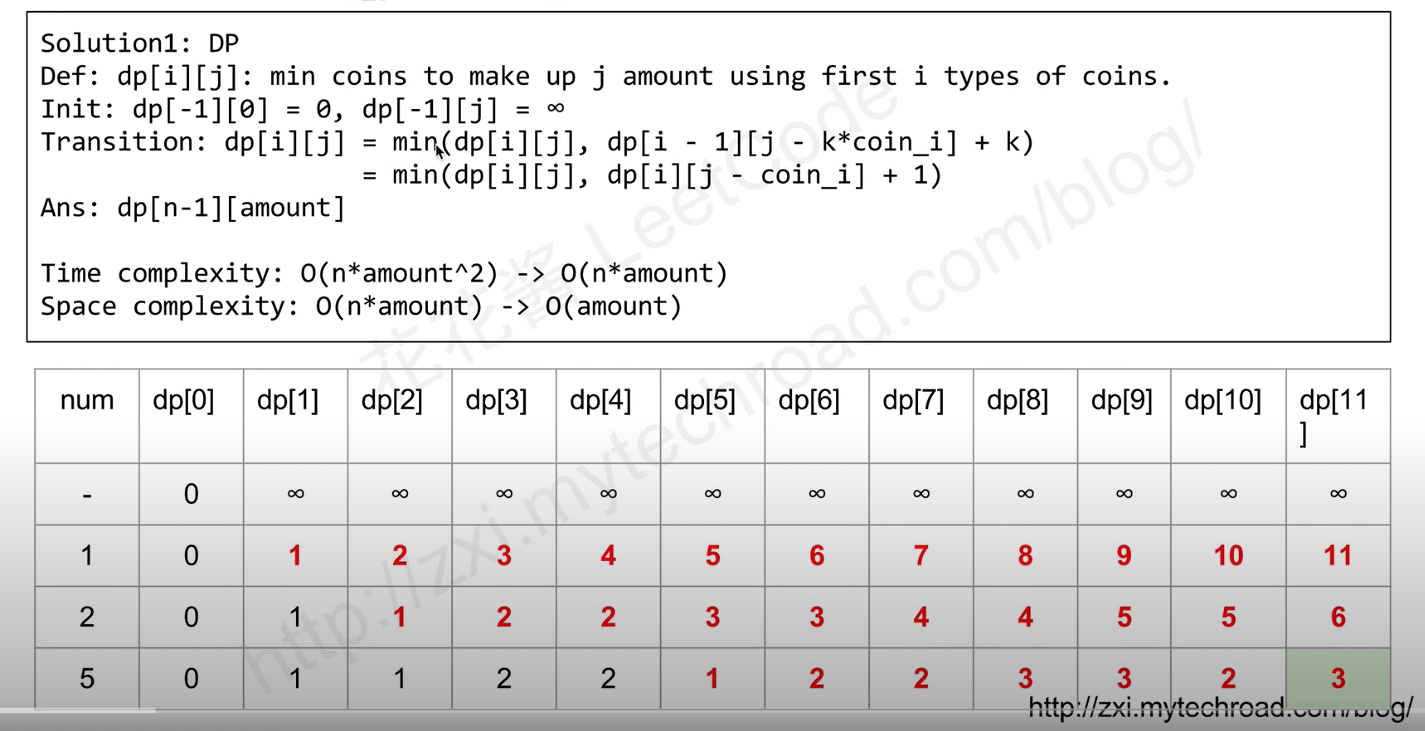

In [22]:
from IPython.display import Image
Image(filename = '322.jpg', width=550)

In [8]:
def coinChange(coins, amount: int) -> int:
    dp = [-1]*(amount+1)
    dp[0] = 0
    for i in range(amount):
        if dp[i] < 0:
            continue
        for coin in coins:
            if i+coin > amount:
                continue
            if dp[i+coin] < 0 or dp[i+coin] > dp[i]+1:
                dp[i+coin] = dp[i] +1
    return dp[-1]

coins = [1, 2, 5]
amount = 11
coinChange(coins, amount)

0 [0, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1]
1 [0, 1, 1, 2, -1, 1, 2, -1, -1, -1, -1, -1]
2 [0, 1, 1, 2, 2, 1, 2, 2, -1, -1, -1, -1]
3 [0, 1, 1, 2, 2, 1, 2, 2, 3, -1, -1, -1]
4 [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, -1, -1]
5 [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, -1]
6 [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]
7 [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]
8 [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]
9 [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]
10 [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]


(3, [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3])

In [19]:
def coinChange(coins, amount):
    """
    :type coins: List[int]
    :type amount: int
    :rtype: int
    """
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0
    for coin in coins:
        for i in range(coin, amount + 1):
            if dp[i - coin] != float('inf'):
                dp[i] = min(dp[i], dp[i - coin] + 1)
    return -1 if dp[amount] == float('inf') else dp[amount]
coins = [1, 2, 5]
amount = 11
coinChange(coins, amount)

3

# 326. Power of Three

Given an integer, write a function to determine if it is a power of three.
Example 1:  
Input: 27  
Output: true  

Example 2:  
Input: 0  
Output: false  

Example 3:  
Input: 9  
Output: true  

Example 4:  
Input: 45  
Output: false  
Follow up: Could you do it **without using any loop / recursion**?

In [9]:
def isPowerOfThree(n: int) -> bool:
    if n == 1:
        return True
    elif n <= 2:
        return False

    while n > 3:
        if n % 3 == 0:
            n /= 3
        else:
            return False
        
    return n == 3

def isPowerOfThree2(n: int) -> bool:
        if n == 0:
            return False
        
        while n%3 == 0:
            n /= 3
        return n == 1

In [9]:
bin(1)
bin(3)
bin(9)
bin(27)

'0b1'

'0b11'

'0b1001'

'0b11011'

# 342. Power of Four

Given an integer (signed 32 bits), write a function to check whether it is a power of 4. 
Example 1:   
Input: 16  
Output: true  
    
Example 2:  
Input: 5  
Output: false  
Follow up: Could you solve it **without loops/recursion**?
### Idea: bit operation
- 转换成二进制，首位为1，有偶数个0
- 先判断输入数的二进制形式为1后面若干个0，再判断1是否在奇数位即可。

In [3]:
bin(1)
bin(4)
bin(16)
bin(64)

def isPowerOfFour(num: int) -> bool:
    return num > 0 and bin(num).count("1") == 1 and bin(num).count("0") % 2 == 1

def isPowerOfFour(num: int) -> bool:
    return num > 0 and num&(num-1) == 0 and (num & 0x55555555) != 0

'0b1'

'0b100'

'0b10000'

'0b1000000'

# 344. Reverse String

Write a function that reverses a string. The input string is given as an array of characters char[].  
Do not allocate extra space for another array, you must do this by **modifying the input array in-place with O(1) extra memory**.  
You may assume all the characters consist of printable ascii characters.

Example 1:  
Input: ["h","e","l","l","o"]  
Output: ["o","l","l","e","h"]  

Example 2:  
Input: ["H","a","n","n","a","h"]  
Output: ["h","a","n","n","a","H"]

### My Solution
- while loop, s.pop()+s.insert(I,s.pop())

In [79]:
def reverseString(s) -> None:
    """
    Do not return anything, modify s in-place instead.
    """
    i = 0
    while i < len(s)-1:
        last = s.pop()
        s.insert(i,last)
        i += 1
    return s 

s = ["h","e","l","l","o"]
reverseString(s)

1 ['o', 'h', 'e', 'l', 'l']
2 ['o', 'l', 'h', 'e', 'l']
3 ['o', 'l', 'l', 'h', 'e']
4 ['o', 'l', 'l', 'e', 'h']


['o', 'l', 'l', 'e', 'h']

### Solution 2 -  轴对称 swap，从两侧向内

In [82]:
def reverseString(s) -> None:
    l,r = 0, len(s)-1
    while l < r:
        s[l],s[r] = s[r],s[l]
        l += 1
        r -= 1
    return s


def reverseString(s) -> None:
        for i in range(len(s)//2):
            s[i],s[-i-1] = s[-i-1],s[i]

['o', 'l', 'l', 'e', 'h']

# 345. Reverse Vowels of a String

Write a function that takes a string as input and reverse only the vowels of a string.

Example 1:    
Input: "hello"  
Output: "holle"

Example 2:  
Input: "leetcode"  
Output: "leotcede"  
Note: The vowels does not include the letter "y".

### Idea:
- set a list vowels (lowercase+uppercase)
- while loop

In [90]:
def reverseVowels(s: str) -> str:
    vowels = 'aeiou'
    l, r = 0, len(s)-1
    s = list(s)
    while l < r:
        if s[l] not in vowels:
            l += 1
        elif s[r] not in vowels:
            r -= 1
        else: 
            s[l],s[r] = s[r],s[l]
            l += 1
            r -= 1
    return str.join('',s) #"".join(s)

s = "hello" 
reverseVowels(s)

'holle'

In [83]:
wowels = 'aeiou'
's' in  wowels

False

# 349. Intersection of Two Arrays - set() no repeating in result

Given two arrays, write a function to compute their intersection.

Example 1:  
Input: nums1 = [1,2,2,1], nums2 = [2,2]  
Output: [2]

Example 2:   
Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]  
Output: [9,4] 

Note:   
Each element in the result must be unique.
The result can be in any order.

In [ ]:
def intersection(nums1, nums2):
    lookup = set()
    for i in nums1:
        lookup.add(i)
    """=lookup=set(nums1)"""
    
    result = []
    for i in nums2:
        if i in lookup:
            result.append(i)
            lookup.discard(i)
    return result 

In [74]:
nums1 = [1,2,2,1]
nums2 = [2,2]
intersection(nums1, nums2)

[2]

# 350. Intersection of Two Arrays II - return back commen nums,even repeating

Given two arrays, write a function to compute their intersection.

Example 1:  
Input: nums1 = [1,2,2,1], nums2 = [2,2]  
Output: [2,2] 

Example 2:  
Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]  
Output: [4,9]

Note:  
Each element in the result should appear as many times as it shows in both arrays.  
The result can be in any order.  
Follow up:  
What if the given array is already sorted? How would you optimize your algorithm?  
What if nums1's size is small compared to nums2's size? Which algorithm is better?  
What if elements of nums2 are stored on disk, and the memory is limited such that you cannot load all elements into the memory at once?

### My Solution - always collections.Counter + for loop

In [5]:
def intersect(nums1, nums2):
    from collections import Counter
    counter1 = Counter(nums1)
    counter2 = Counter(nums2)
    result = []
    for i in counter1:
        if i in counter2:
            result += [i]*min(counter1[i],counter2[i])    
    return result

### My Solution 2 - lookup dict{} + for loop

In [45]:
def intersect2(nums1, nums2):
    if len(nums1) > len(nums2):
    return self.intersect(nums2,nums1)

    lookup = {}
    result = []
    for i in nums1:
        if i not in lookup:
            lookup[i] = 1
        else:
            lookup[i] += 1
    for j in nums2:
        if j in lookup:
            if lookup[j] < 1:
                continue
            else:
                result.append(j)
                lookup[j] -= 1
    return result

In [46]:
def intersect3(nums1, nums2):
    if len(nums1) > len(nums2): # reduce space complexity
        return intersect3(nums2,nums1)
    import collections
    lookup = collections.defaultdict(int)
    for i in nums1:
        lookup[i] += 1
        
    result = []
    for i in nums1:
        if lookup[i] > 0:
            result += i,
            lookup[i] -= 1
    return result

In [47]:
nums1,nums2 = [1,2,2,1],[2,2]
%timeit intersect2(nums1, nums2)

2.31 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
nums3,nums4 = [4,9,5],[9,4,9,8,4]
%timeit intersect2(nums3, nums4)

2.21 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
%timeit intersect3(nums3, nums4)

4.02 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 367. Valid Perfect Square

Given a positive integer num, write a function which returns True if num is a perfect square else False. 
Follow up: Do not use any built-in library function such as sqrt.

Example 1:  
Input: num = 16  
Output: true   
    
Example 2:  
Input: num = 14  
Output: false

Constraints:  
1 <= num <= 2^31 - 1

### My Solution

In [10]:
def isPerfectSquare(num: int) -> bool:
    if num == 1: 
        return True
    left, right = 1, num//2
    while left <= right:
        mid = left + (right-left)//2
        if mid > num/mid:
            right = mid -1
        else: 
            left = mid + 1
    return (left-1)*(left-1) == num
for i in range(1,11):
    print("i:",i,isPerfectSquare(num=i))

i: 1 True
i: 2 False
i: 3 False
i: 4 True
i: 5 False
i: 6 False
i: 7 False
i: 8 False
i: 9 True
i: 10 False


### Original Solution 

In [ ]:
def isPerfectSquare(self, num: int) -> bool:
    if num == 1:
        return True
    low, high = 1, num
    while low <= high:
        mid = low + (low + high)// 2 
        if mid == num/mid:
            return True
        elif mid > num/mid:
            high = mid - 1 
        else:
            low = mid + 1 
    return False

# 374. Guess Number Higher or Lower - Binary Search

We are playing the Guess Game. The game is as follows:  
I pick a number from 1 to n. You have to guess which number I picked.  
Every time you guess wrong, I'll tell you whether the number is higher or lower.  
You call a pre-defined API guess(int num) which returns 3 possible results (-1, 1, or 0):  
-1 : My number is lower -- it means choose a larger one.  
 1 : My number is higher    
 0 : Congrats! You got it!  
 
Example :    
Input: n = 10, pick = 6  
Output: 6

In [ ]:
# The guess API is already defined for you.
# @param num, your guess
# @return -1 if my number is lower, 1 if my number is higher, otherwise return 0
# def guess(num: int) -> int:

class Solution:
    def guessNumber(self, n: int) -> int:
        left, right = 1, n
        while left <= right:
            mid = (left + right)//2
            if guess(mid) == 0:
                return mid
            elif guess(mid) == 1:
                left = mid + 1
            else:
                right = mid - 1

# 387. First Unique Character in a String

Given a string, find the first non-repeating character in it and return it's index. If it doesn't exist, return -1.  

Examples:  
s = "leetcode"  
return 0.   

s = "loveleetcode",  
return 2.  
Note: You may assume the string contain only lowercase letters.

In [93]:
def firstUniqChar(s: str) -> int:
    from collections import Counter
    sCounter = Counter(s)
    for i,v in enumerate(s):
        if sCounter[v] == 1:
            return i
    return -1

s = "leetcode"
firstUniqChar(s)
s = "loveleetcode"
firstUniqChar(s)

0

2

# 389. Find the Difference

Given two strings s and t which consist of only lowercase letters. 
String t is generated by random shuffling string s and then add one more letter at a random position.
Find the letter that was added in t.

Example:  
Input:  
s = "abcd"  
t = "abcde"  
Output: e  
Explanation: 'e' is the letter that was added.

### Idea 1: use collections.Counter

In [ ]:
def findTheDifference(s: str, t: str) -> str:
    cs = collections.Counter(s)
    ct = collections.Counter(t)
    for i in ct:
        if i not in cs or ct[i]>cs[i]:
            return i   
#Runtime: 20 ms, faster than 99.62% of Python3 online submissions for Find the Difference.
#Memory Usage: 13.8 MB, less than 77.55% of Python3 online submissions for Find the Difference.
def findTheDifference2(s: str, t: str) -> str:
    dict_s = {}
    for x in s:
        if x in dict_s:
            ds[x] += 1
        else:
            ds[x] = 1
            
    for y in t:
        if y not in dict_s:
            return y
        elif dict_s[y] == 0:
            return y
        else:
            dict_s[y] -= 1

# 392. Is Subsequence

iven a string s and a string t, check if s is subsequence of t.  
A subsequence of a string is a new string which is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (ie, "ace" is a subsequence of "abcde" while "aec" is not).

Follow up:
If there are lots of incoming S, say S1, S2, ... , Sk where k >= 1B, and you want to check one by one to see if T has its subsequence. In this scenario, how would you change your code?

Credits:
Special thanks to @pbrother for adding this problem and creating all test cases.

Example 1:  
Input: s = "abc", t = "ahbgdc"  
Output: true 

Example 2:  
Input: s = "axc", t = "ahbgdc"  
Output: false 

Constraints:  
0 <= s.length <= 100  
0 <= t.length <= 10^4  
Both strings consists only of lowercase characters.

### My Solution - idea:
- consider special cases
- 1 pointer in each str, count the same letter in sequence, whether equals to len(s)

In [86]:
def isSubsequence(s: str, t: str) -> bool:

    if not s or s == t:
        return True    
    if not t:
        return False    
  
    count = 0
    i ,j = 0, 0
    while i < len(s) and j < len(t):
        if s[i] == t[j]:
            count += 1
            i += 1
            j += 1
        else: 
            j += 1
    if count == len(s):
        return True
    return False

#Runtime: 32 ms, faster than 91.74% of Python3 online submissions for Is Subsequence.
#Memory Usage: 13.8 MB, less than 100.00% of Python3 online submissions for Is Subsequence

In [88]:
def isSubsequence2(s: str, t: str) -> bool:
    if not s:
        return True
    len_s = len(s)
    i = 0
    for char in t:
        if char == s[i]:
            i += 1
        if i == len_s:
            return Ture
    return False

In [89]:
s = "abc"
t = "ahbgdc"
isSubsequence(s, t)
s1 = "axc"
t1 = "ahbgdc"
isSubsequence(s1, t1)

s2 = "acb"
t2 = "ahbgdc"
isSubsequence2(s2, t2)

True

False

False